In [3]:
#Importing Libraries
#Data Handling
import pandas as pd
import numpy as np
import sklearn
import math
import random

#plotting
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import Markdown, display
import ipywidgets as widgets
import seaborn as sns
sns.set()

import sys
sys.path.append('/Volumes/GoogleDrive/My Drive/PHD-GMU/Classes/1st year/2021-Spring/CS701 - Research Experience/EDM/FairEd(?)/Fair Risk Identification')


#Pipelines
from source import *
import source.fairness as fm
import source.pipes as op

#Sampling
from sklearn.model_selection import train_test_split

#Storing trains
import pickle

%load_ext autoreload
%autoreload 2


# Create Functions

In [4]:
def createFeatures(number_obs_each, number_features):
    #return a dataframe
    data = pd.DataFrame()
    rand = np.random.RandomState(0)
    for i in range(number_features):
        r = rand.normal(0,1,number_obs_each)
        n = pd.DataFrame(np.concatenate((r,r)))
        data = pd.concat([data,n], axis = 1)
        
    return data

def createS(number_obs_each):
    #number_obs_each is the number of observations for each class (it is assumed two classes)
    #return a numpy
    s0 = np.tile(0, number_obs_each)
    s1 = np.tile(1, number_obs_each)
    s = np.concatenate((s0, s1))
    
    return s

def createX(number_obs, mean, std):
    #number_obs_each is the number of observations for each class (it is assumed two classes)
    #return a numpy  
    x = np.random.normal(mean,std,number_obs)
    
    return x

def createX2(number_obs, mean, std, bias):
    #number_obs_each is the number of observations for each class (it is assumed two classes)
    #return a numpy  
    x = np.random.normal(mean,std,number_obs)
    
    for i in range(len(x)):
        if x[i]>0: x[i]+=bias
        elif x[i]<0: x[i]-=bias
    
    return x

def createY(number_obs, X):
    #create y by considering y=1 if x>=0 and y=0 otherwise
    #return a numpy
    y = [1 if i>=0 else 0 for i in X]
    y = np.array(y)
    
    return y

# Generate Datasedata_fts

In [3]:
#Create set of datasets
datasets = {}
datasets_train = {}
datasets_tests = {}
y_labels = {}
A = {}

In [5]:
#Case1
X1_0 = createX(2500, 10, 1)
X1_1 = createX(2500, 1, 1)
X2_0 = createX(2500, 1, 1)
X2_1 = createX(2500, 10, 1)

S_0 = np.zeros(2500, dtype=int)
S_1 = np.ones(2500, dtype=int)

X1 = np.concatenate((X1_0, X1_1))
X2 = np.concatenate((X2_0, X2_1))
S = np.concatenate((S_0, S_1))
Y = np.concatenate((np.zeros(2500, dtype=int), np.ones(2500, dtype=int)))

data_f = pd.concat([pd.DataFrame(X1), pd.DataFrame(X2), pd.DataFrame(S)], axis = 1)
cols = ['col_'+str(i) for i in range(2)]
cols.append('S')
data_f.columns = cols

#Splitting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(data_f, Y, test_size = 0.3, stratify= Y, random_state = 1)

#Get the train and test datasets
X_train_unaware = X_train.iloc[:,X_train.columns != 'S']
X_test_unaware = X_test.iloc[:,X_test.columns != 'S']
A_train = X_train.loc[:,['S']]
A_test = X_test.loc[:,['S']]

train_datasets = {
    'aware': X_train,
    'unaware': X_train_unaware
}

test_datasets = {
    'aware': X_test,
    'unaware': X_test_unaware
}

labels = {
    'train': y_train,
    'test': y_test
}

A_sensitive = {
    'train': A_train,
    'test': A_test
}

#Saving train and test datasets
datasets['case_1'] = data_f
datasets_train['case_1'] = train_datasets
datasets_tests['case_1'] = test_datasets
y_labels['case_1'] = labels
A['case_1'] = A_sensitive

In [6]:
#Case1.1-Imbalanced
X1_0 = createX(250, 10, 1)
X1_1 = createX(2500, 1, 1)
X2_0 = createX(250, 1, 1)
X2_1 = createX(2500, 10, 1)

S_0 = np.zeros(250, dtype=int)
S_1 = np.ones(2500, dtype=int)

X1 = np.concatenate((X1_0, X1_1))
X2 = np.concatenate((X2_0, X2_1))
S = np.concatenate((S_0, S_1))
Y = np.concatenate((np.zeros(250, dtype=int), np.ones(2500, dtype=int)))

data_f = pd.concat([pd.DataFrame(X1), pd.DataFrame(X2), pd.DataFrame(S)], axis = 1)
cols = ['col_'+str(i) for i in range(2)]
cols.append('S')
data_f.columns = cols

#Splitting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(data_f, Y, test_size = 0.3, stratify= Y, random_state = 1)

#Get the train and test datasets
X_train_unaware = X_train.iloc[:,X_train.columns != 'S']
X_test_unaware = X_test.iloc[:,X_test.columns != 'S']
A_train = X_train.loc[:,['S']]
A_test = X_test.loc[:,['S']]

train_datasets = {
    'aware': X_train,
    'unaware': X_train_unaware
}

test_datasets = {
    'aware': X_test,
    'unaware': X_test_unaware
}

labels = {
    'train': y_train,
    'test': y_test
}

A_sensitive = {
    'train': A_train,
    'test': A_test
}

#Saving train and test datasets
datasets['case_1_imbalanced'] = data_f
datasets_train['case_1_imbalanced'] = train_datasets
datasets_tests['case_1_imbalanced'] = test_datasets
y_labels['case_1_imbalanced'] = labels
A['case_1_imbalanced'] = A_sensitive

In [7]:
#Case2
X1_0 = createX(2500, 10, 1)
X1_1 = createX(2500, 10, 1)
X2_0 = createX(2500, 1, 1)
X2_1 = createX(2500, 1, 1)

S_0 = np.zeros(2500, dtype=int)
S_1 = np.ones(2500, dtype=int)

X1 = np.concatenate((X1_0, X1_1))
X2 = np.concatenate((X2_0, X2_1))
S = np.concatenate((S_0, S_1))
Y = np.concatenate((np.zeros(2500, dtype=int), np.ones(2500, dtype=int)))

data_f = pd.concat([pd.DataFrame(X1), pd.DataFrame(X2), pd.DataFrame(S)], axis = 1)
cols = ['col_'+str(i) for i in range(2)]
cols.append('S')
data_f.columns = cols

#Splitting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(data_f, Y, test_size = 0.3, stratify= Y, random_state = 1)

#Get the train and test datasets
X_train_unaware = X_train.iloc[:,X_train.columns != 'S']
X_test_unaware = X_test.iloc[:,X_test.columns != 'S']
A_train = X_train.loc[:,['S']]
A_test = X_test.loc[:,['S']]

train_datasets = {
    'aware': X_train,
    'unaware': X_train_unaware
}

test_datasets = {
    'aware': X_test,
    'unaware': X_test_unaware
}

labels = {
    'train': y_train,
    'test': y_test
}

A_sensitive = {
    'train': A_train,
    'test': A_test
}

#Saving train and test datasets
datasets['case_2'] = data_f
datasets_train['case_2'] = train_datasets
datasets_tests['case_2'] = test_datasets
y_labels['case_2'] = labels
A['case_2'] = A_sensitive

In [8]:
#Case2.1 - Imbalanced
X1_0 = createX(250, 10, 1)
X1_1 = createX(2500, 10, 1)
X2_0 = createX(250, 1, 1)
X2_1 = createX(2500, 1, 1)

S_0 = np.zeros(250, dtype=int)
S_1 = np.ones(2500, dtype=int)

X1 = np.concatenate((X1_0, X1_1))
X2 = np.concatenate((X2_0, X2_1))
S = np.concatenate((S_0, S_1))
Y = np.concatenate((np.zeros(250, dtype=int), np.ones(2500, dtype=int)))

data_f = pd.concat([pd.DataFrame(X1), pd.DataFrame(X2), pd.DataFrame(S)], axis = 1)
cols = ['col_'+str(i) for i in range(2)]
cols.append('S')
data_f.columns = cols

#Splitting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(data_f, Y, test_size = 0.3, stratify= Y, random_state = 1)

#Get the train and test datasets
X_train_unaware = X_train.iloc[:,X_train.columns != 'S']
X_test_unaware = X_test.iloc[:,X_test.columns != 'S']
A_train = X_train.loc[:,['S']]
A_test = X_test.loc[:,['S']]

train_datasets = {
    'aware': X_train,
    'unaware': X_train_unaware
}

test_datasets = {
    'aware': X_test,
    'unaware': X_test_unaware
}

labels = {
    'train': y_train,
    'test': y_test
}

A_sensitive = {
    'train': A_train,
    'test': A_test
}

#Saving train and test datasets
datasets['case_2_imbalanced'] = data_f
datasets_train['case_2_imbalanced'] = train_datasets
datasets_tests['case_2_imbalanced'] = test_datasets
y_labels['case_2_imbalanced'] = labels
A['case_2_imbalanced'] = A_sensitive

In [9]:
#Case2 - Equal Distribution of Label
X1_0 = createX(2500, 10, 1)
X1_1 = createX(2500, 10, 1)
X2_0 = createX(2500, 1, 1)
X2_1 = createX(2500, 1, 1)

S_0 = np.zeros(2500, dtype=int)
S_1 = np.ones(2500, dtype=int)

X1 = np.concatenate((X1_0, X1_1))
X2 = np.concatenate((X2_0, X2_1))
S = np.concatenate((S_0, S_1))
Y = np.zeros(5000, dtype=int)
for i in range(5000):
    if i%2==0:
        Y[i]=1

data_f = pd.concat([pd.DataFrame(X1), pd.DataFrame(X2), pd.DataFrame(S)], axis = 1)
cols = ['col_'+str(i) for i in range(2)]
cols.append('S')
data_f.columns = cols

#Splitting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(data_f, Y, test_size = 0.3, stratify= Y, random_state = 1)

#Get the train and test datasets
X_train_unaware = X_train.iloc[:,X_train.columns != 'S']
X_test_unaware = X_test.iloc[:,X_test.columns != 'S']
A_train = X_train.loc[:,['S']]
A_test = X_test.loc[:,['S']]

train_datasets = {
    'aware': X_train,
    'unaware': X_train_unaware
}

test_datasets = {
    'aware': X_test,
    'unaware': X_test_unaware
}

labels = {
    'train': y_train,
    'test': y_test
}

A_sensitive = {
    'train': A_train,
    'test': A_test
}

#Saving train and test datasets
datasets['case_2_equal_y'] = data_f
datasets_train['case_2_equal_y'] = train_datasets
datasets_tests['case_2_equal_y'] = test_datasets
y_labels['case_2_equal_y'] = labels
A['case_2_equal_y'] = A_sensitive

In [10]:
#Case2 - Non Linear Separable into Linear Separable 
X1_0 = createX(2500, 0, 1)
X1_1 = createX(2500, 0, 4)
X2_0 = createX(2500, 0, 1)
X2_1 = np.zeros(2500, dtype=float)

for i in range(len(X1_1)):
    if X1_1[i]>0: s_2=1
    else: s_2=-1
    
    if abs(X1_1[i])<4:
        val  = np.random.normal(0,4,1)[0]
        if abs(val)<math.sqrt(4**2-X1_1[i]**2):
            X2_1[i] = s_2*(math.sqrt(4**2-X1_1[i]**2)+random.uniform(0,1))
        else:
            X2_1[i] = val
    else:
        X2_1[i] = np.random.normal(0,4,1)[0]
        
X3_0 = abs(X1_0*X2_0)
X3_1 = abs(X1_1*X2_1)

S_0 = np.zeros(2500, dtype=int)
S_1 = np.ones(2500, dtype=int)

X1 = np.concatenate((X1_0, X1_1))
X2 = np.concatenate((X2_0, X2_1))
X3 = np.concatenate((X3_0, X3_1))
S = np.concatenate((S_0, S_1))
Y = np.concatenate((np.zeros(2500, dtype=int), np.ones(2500, dtype=int)))

data_f = pd.concat([pd.DataFrame(X1), pd.DataFrame(X2), pd.DataFrame(X3), pd.DataFrame(S)], axis = 1)
cols = ['col_'+str(i) for i in range(3)]
cols.append('S')
data_f.columns = cols

#Splitting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(data_f, Y, test_size = 0.3, stratify= Y, random_state = 1)

#Get the train and test datasets
X_train_unaware = X_train.iloc[:,X_train.columns != 'S']
X_test_unaware = X_test.iloc[:,X_test.columns != 'S']
A_train = X_train.loc[:,['S']]
A_test = X_test.loc[:,['S']]

train_datasets = {
    'aware': X_train,
    'unaware': X_train_unaware
}

test_datasets = {
    'aware': X_test,
    'unaware': X_test_unaware
}

labels = {
    'train': y_train,
    'test': y_test
}

A_sensitive = {
    'train': A_train,
    'test': A_test
}

#Saving train and test datasets
datasets['case_2_linear_separable'] = data_f
datasets_train['case_2_linear_separable'] = train_datasets
datasets_tests['case_2_linear_separable'] = test_datasets
y_labels['case_2_linear_separable'] = labels
A['case_2_linear_separable'] = A_sensitive

In [11]:
#Case3
X1_0 = createX(2500, 3, 1)
X1_1 = createX(2500, 1, 2)
X2_0 = createX(2500, 9, 1)
X2_1 = createX(2500, 10, 2)

S_0 = np.zeros(2500, dtype=int)
S_1 = np.ones(2500, dtype=int)

X1 = np.concatenate((X1_0, X1_1))
X2 = np.concatenate((X2_0, X2_1))
S = np.concatenate((S_0, S_1))
Y = np.concatenate((np.zeros(2500, dtype=int), np.ones(2500, dtype=int)))

data_f = pd.concat([pd.DataFrame(X1), pd.DataFrame(X2), pd.DataFrame(S)], axis = 1)
cols = ['col_'+str(i) for i in range(2)]
cols.append('S')
data_f.columns = cols

#Splitting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(data_f, Y, test_size = 0.3, stratify= Y, random_state = 1)

#Get the train and test datasets
X_train_unaware = X_train.iloc[:,X_train.columns != 'S']
X_test_unaware = X_test.iloc[:,X_test.columns != 'S']
A_train = X_train.loc[:,['S']]
A_test = X_test.loc[:,['S']]

train_datasets = {
    'aware': X_train,
    'unaware': X_train_unaware
}

test_datasets = {
    'aware': X_test,
    'unaware': X_test_unaware
}

labels = {
    'train': y_train,
    'test': y_test
}

A_sensitive = {
    'train': A_train,
    'test': A_test
}

#Saving train and test datasets
datasets['case_3'] = data_f
datasets_train['case_3'] = train_datasets
datasets_tests['case_3'] = test_datasets
y_labels['case_3'] = labels
A['case_3'] = A_sensitive

In [12]:
#Case3 - Imbalanced
X1_0 = createX(250, 3, 1)
X1_1 = createX(2500, 1, 2)
X2_0 = createX(250, 9, 1)
X2_1 = createX(2500, 10, 2)

S_0 = np.zeros(250, dtype=int)
S_1 = np.ones(2500, dtype=int)

X1 = np.concatenate((X1_0, X1_1))
X2 = np.concatenate((X2_0, X2_1))
S = np.concatenate((S_0, S_1))
Y = np.concatenate((np.zeros(250, dtype=int), np.ones(2500, dtype=int)))

data_f = pd.concat([pd.DataFrame(X1), pd.DataFrame(X2), pd.DataFrame(S)], axis = 1)
cols = ['col_'+str(i) for i in range(2)]
cols.append('S')
data_f.columns = cols

#Splitting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(data_f, Y, test_size = 0.3, stratify= Y, random_state = 1)

#Get the train and test datasets
X_train_unaware = X_train.iloc[:,X_train.columns != 'S']
X_test_unaware = X_test.iloc[:,X_test.columns != 'S']
A_train = X_train.loc[:,['S']]
A_test = X_test.loc[:,['S']]

train_datasets = {
    'aware': X_train,
    'unaware': X_train_unaware
}

test_datasets = {
    'aware': X_test,
    'unaware': X_test_unaware
}

labels = {
    'train': y_train,
    'test': y_test
}

A_sensitive = {
    'train': A_train,
    'test': A_test
}

#Saving train and test datasets
datasets['case_3_imbalanced'] = data_f
datasets_train['case_3_imbalanced'] = train_datasets
datasets_tests['case_3_imbalanced'] = test_datasets
y_labels['case_3_imbalanced'] = labels
A['case_3_imbalanced'] = A_sensitive

In [13]:
#Case4
X1_0 = createX(2000, 15, 2)
X1_0 = np.concatenate((X1_0, createX(500, 13, 1)))
X1_1 = createX(2500, 1, 2)

X2_0 = createX(2000, 1, 2)
X2_0 = np.concatenate((X2_0, createX(500, 1, 1)))
X2_1 = createX(2500, 15, 2)

S_0 = np.zeros(2500, dtype=int)
S_1 = np.ones(2500, dtype=int)

X1 = np.concatenate((X1_0, X1_1))
X2 = np.concatenate((X2_0, X2_1))
S = np.concatenate((S_0, S_1))
Y = np.concatenate((np.zeros(2000, dtype=int), np.ones(3000, dtype=int)))

data_f = pd.concat([pd.DataFrame(X1), pd.DataFrame(X2), pd.DataFrame(S)], axis = 1)
cols = ['col_'+str(i) for i in range(2)]
cols.append('S')
data_f.columns = cols

#Splitting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(data_f, Y, test_size = 0.3, stratify= Y, random_state = 1)

#Get the train and test datasets
X_train_unaware = X_train.iloc[:,X_train.columns != 'S']
X_test_unaware = X_test.iloc[:,X_test.columns != 'S']
A_train = X_train.loc[:,['S']]
A_test = X_test.loc[:,['S']]

train_datasets = {
    'aware': X_train,
    'unaware': X_train_unaware
}

test_datasets = {
    'aware': X_test,
    'unaware': X_test_unaware
}

labels = {
    'train': y_train,
    'test': y_test
}

A_sensitive = {
    'train': A_train,
    'test': A_test
}

#Saving train and test datasets
datasets['case_4'] = data_f
datasets_train['case_4'] = train_datasets
datasets_tests['case_4'] = test_datasets
y_labels['case_4'] = labels
A['case_4'] = A_sensitive

In [14]:
#Case4 - Imbalanced
X1_0 = createX(200, 15, 2)
X1_0 = np.concatenate((X1_0, createX(50, 13, 1)))
X1_1 = createX(2500, 1, 2)

X2_0 = createX(200, 1, 2)
X2_0 = np.concatenate((X2_0, createX(50, 1, 1)))
X2_1 = createX(2500, 15, 2)

S_0 = np.zeros(250, dtype=int)
S_1 = np.ones(2500, dtype=int)

X1 = np.concatenate((X1_0, X1_1))
X2 = np.concatenate((X2_0, X2_1))
S = np.concatenate((S_0, S_1))
Y = np.concatenate((np.zeros(200, dtype=int), np.ones(2550, dtype=int)))

data_f = pd.concat([pd.DataFrame(X1), pd.DataFrame(X2), pd.DataFrame(S)], axis = 1)
cols = ['col_'+str(i) for i in range(2)]
cols.append('S')
data_f.columns = cols

#Splitting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(data_f, Y, test_size = 0.3, stratify= Y, random_state = 1)

#Get the train and test datasets
X_train_unaware = X_train.iloc[:,X_train.columns != 'S']
X_test_unaware = X_test.iloc[:,X_test.columns != 'S']
A_train = X_train.loc[:,['S']]
A_test = X_test.loc[:,['S']]

train_datasets = {
    'aware': X_train,
    'unaware': X_train_unaware
}

test_datasets = {
    'aware': X_test,
    'unaware': X_test_unaware
}

labels = {
    'train': y_train,
    'test': y_test
}

A_sensitive = {
    'train': A_train,
    'test': A_test
}

#Saving train and test datasets
datasets['case_4_imbalanced'] = data_f
datasets_train['case_4_imbalanced'] = train_datasets
datasets_tests['case_4_imbalanced'] = test_datasets
y_labels['case_4_imbalanced'] = labels
A['case_4_imbalanced'] = A_sensitive

In [14]:
with open('../../pipes/synthetic/preprocessing_test.pickle','wb') as f:
    pickle.dump(datasets_tests,f)
with open('../../pipes/synthetic/preprocessing_test_norm.pickle', 'wb') as f:
    pickle.dump(datasets_train, f)
with open('../../pipes/synthetic/y.pickle', 'wb') as f:
    pickle.dump(y_labels,f)
with open('../../pipes/synthetic/A.pickle','wb') as f:
    pickle.dump(A, f)

In [5]:
with open('../../pipes/synthetic/preprocessing_test.pickle','rb') as f:
    datasets_tests = pickle.load(f)
with open('../../pipes/synthetic/preprocessing_test_norm.pickle', 'rb') as f:
    datasets_train = pickle.load(f)
with open('../../pipes/synthetic/y.pickle', 'rb') as f:
    y_labels = pickle.load(f)
with open('../../pipes/synthetic/A.pickle','rb') as f:
    A = pickle.load(f)

# Run experiments with DT methods

In [ ]:
#Defining Models and parameters for gid
#Decision Tree
parameters = {'DT__criterion': ['gini'], 'DT__splitter': ['random'], 'DT__max_depth': [None], 'DT__min_samples_leaf': [2]}
dt = DecisionTreeClassifier(random_state=0)

dt_sample = {}

for case in datasets_train:
    dt_res_sample = {}
    for ds in datasets_train[case]:
        if 'unaware' in ds:
            print("Starting for..."+str(case)+'...'+ds)
            X = datasets_train[case][ds].to_numpy()
            for i in range(0,100):
                sel = random.choices(range(X.shape[0]), k=int(X.shape[0]*0.3))
                sel_var = random.sample(range(X.shape[1]), k = max(2,int(X.shape[1])-1))
                sel.sort()
                sel_var.sort()
                X_sample = X[sel,:][:,sel_var]
                y_sample = y_labels[case]['train'][sel]

                fit = op.get_grid(X_sample, y_sample, parameters, dt, 'DT', 'accuracy')

                dt_res_sample[ds+"_"+str(i)] = (fit, sel, sel_var)

            print("End for "+ds)
            print()
    dt_sample[case] = dt_res_sample

Starting for...case_1...unaware
End for unaware

Starting for...case_1_imbalanced...unaware
End for unaware

Starting for...case_2...unaware
End for unaware

Starting for...case_2_imbalanced...unaware
End for unaware

Starting for...case_2_equal_y...unaware
End for unaware

Starting for...case_2_linear_separable...unaware
End for unaware

Starting for...case_3...unaware
End for unaware

Starting for...case_3_imbalanced...unaware
End for unaware

Starting for...case_4...unaware
End for unaware

Starting for...case_4_imbalanced...unaware
End for unaware



In [67]:
#Defining Models and parameters for gid
#Decision Tree
parameters = {'DT__class_weight': ['balanced'], 'DT__criterion': ['gini'], 'DT__splitter': ['random'], 'DT__max_depth': [None], 'DT__min_samples_leaf': [2]}
dt = DecisionTreeClassifier(random_state=0)

for case in datasets_train:
    dt_res_sample = dt_sample[case]
    for ds in datasets_train[case]:
        if 'unaware' in ds:
            print("Starting for..."+str(case)+'...'+ds)
            X = datasets_train[case][ds].to_numpy()
            for i in range(0,100):
                sel = random.choices(range(X.shape[0]), k=int(X.shape[0]*0.3))
                sel_var = random.sample(range(X.shape[1]), k = max(2,int(X.shape[1])-1))
                sel.sort()
                sel_var.sort()
                X_sample = X[sel,:][:,sel_var]
                y_sample = y_labels[case]['train'][sel]

                fit = op.get_grid(X_sample, y_sample, parameters, dt, 'DT', 'accuracy')

                dt_res_sample[ds+"_balanced_"+str(i)] = (fit, sel, sel_var)
                
            print("End for "+ds)
            print()
    dt_sample[case] = dt_res_sample

Starting for...case_1...unaware
End for unaware

Starting for...case_1_imbalanced...unaware
End for unaware

Starting for...case_2...unaware
End for unaware

Starting for...case_2_imbalanced...unaware
End for unaware

Starting for...case_2_equal_y...unaware
End for unaware

Starting for...case_2_linear_separable...unaware
End for unaware

Starting for...case_3...unaware
End for unaware

Starting for...case_3_imbalanced...unaware
End for unaware

Starting for...case_4...unaware
End for unaware

Starting for...case_4_imbalanced...unaware
End for unaware



In [72]:
train_models = {'DT_sample':dt_sample}

In [17]:
#Run this code for storing grid results
with open('../../grid/synthetic/fairness/train_models.pickle', 'wb') as f:
    pickle.dump(train_models, f)

In [6]:
#Run this code for loading models
with open('../../grid/synthetic/fairness/train_models.pickle', 'rb') as f:
    train_models = pickle.load(f)

# Discrimination Risk Computation

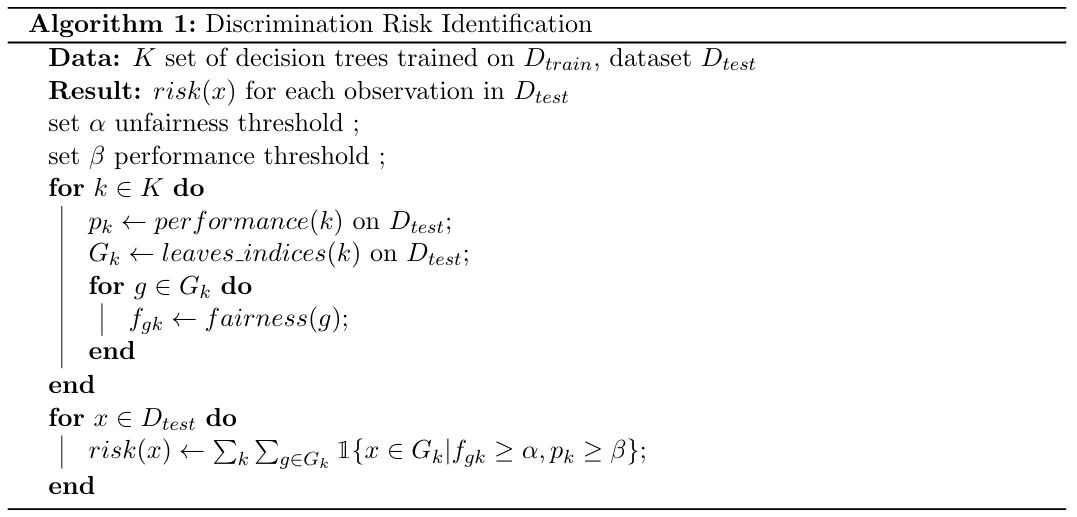

In [8]:
from IPython.display import Image
Image("img/algorithm.png")

In [7]:
#Old Version
def disc_leav(model, dataset, A, priv_class, y):
    #models: set of decision trees trained on a data train. 
    #dataset: a numpy that contains n samples of d dimension. The number of dimension should be consistent with models.
    #y: numpy size n, ground truth of each dataset.
    #A: numpy size n, membership of sensitive attribute
    #priv_class: string or value of the priviliged group in A.
    
    #Get the predictions and leave indices
    leaves = model.apply(dataset)
    y_pred = model.predict(dataset)
    
    #Compute the accuracy of dt
    f1 = fm.f1score(y, y_pred)
    
    disc_leave = []
    for leaf in np.unique(leaves):
        A_leaf = np.unique(A[leaves==leaf])
        
        if all(x in A_leaf for x in np.unique(A)):
            disc = fm.discrimanation(np.array(y[leaves==leaf]).flatten(), y_pred[leaves==leaf], np.array(A[leaves==leaf]).flatten(), priv_class= priv_class)
        else:
            disc = 0
            
        disc_leave.append(disc)
    
    disc_leave = np.array(disc_leave)
    level_disc = dict(zip(np.unique(leaves), disc_leave))
    
    return f1, level_disc, leaves

def risk_disc(y, leaves_discr, performances, indices, leaves, alpha=None, beta=None, absolute = True):
    #@Return risk discrimination level of each sample in dataset
    #dataset: a numpy that contains n samples of d dimension. The number of dimension should be consistent with models.
    #models: set of decision trees trained on a data train. 
    #y: numpy size n, ground truth of each dataset.
    #a: numpy size n, membership of sensitive attribute
    #Compute the times any observation was discriminated
    
    total = 0
    count = 0
    for i in leaves_discr:
        for j in leaves_discr[i]:
            if leaves_discr[i][j] != None and leaves_discr[i][j] >0:
                total += abs(leaves_discr[i][j])
                count +=1

    if count == 0: ave = 0
    else: ave = total/count

    var = 0
    for i in leaves_discr:
        for j in leaves_discr[i]:
            if leaves_discr[i][j] != None and leaves_discr[i][j] >0:
                var += abs(leaves_discr[i][j]-ave)**2
    
    var = var/(count-1)
    
    if alpha==None: threshold_disc = ave+var**(1/2)
    else: threshold_disc=alpha
    
    if beta==None: threshold_perfo = sum(performances.values())/len(performances.values())
    else: threshold_perfo=beta
    
    sum_total = np.zeros(y.shape[0])
    sum_thdisc = np.zeros(y.shape[0])
    sum_thdiscperfo = np.zeros(y.shape[0])
    count_discarded = np.zeros(y.shape[0])
    
    for index in indices:
        for leaf in leaves_discr[index]:
            if (leaves_discr[index][leaf] == None):
                count_discarded += 1*(leaves[index]==leaf)
            else:
                if absolute: sum_total+=abs(1*(leaves[index]==leaf)*(leaves_discr[index][leaf]))
                else: sum_total+=1*(leaves[index]==leaf)*(leaves_discr[index][leaf])

                if abs(leaves_discr[index][leaf])>=threshold_disc:
                    if absolute: sum_thdisc += abs(1*(leaves[index]==leaf)*leaves_discr[index][leaf])
                    else: sum_thdisc += 1*(leaves[index]==leaf)*leaves_discr[index][leaf]
                
                    if performances[index]>=threshold_perfo:
                        if absolute: sum_thdiscperfo += abs(1*(leaves[index]==leaf)*leaves_discr[index][leaf])
                        else: sum_thdiscperfo += 1*(leaves[index]==leaf)*leaves_discr[index][leaf]
                    else:
                        count_discarded += 1*(leaves[index]==leaf)
                else:
                    count_discarded += 1*(leaves[index]==leaf)
    
    return sum_total, sum_thdisc, sum_thdiscperfo, count_discarded, threshold_disc, threshold_perfo

def findParameters(alpha_lim, beta_lim,steps_alpha,steps_beta,threshold, **kargs):
    #**kargs should provide y, leaves_discr, performances, indices, leaves
    """
    It returns the thresholds for alpha and beta
    Input:
    - threshold: int, number of minimal counts in the leaves
    """
    a_op = 0
    b_op = 0
    for a in np.arange(0, alpha_lim, steps_alpha):
        _, _, _, count_discarded, _, _ = risk_disc(alpha=a, beta=b_op, **kargs)
        if 200-max(count_discarded)<threshold: #the 200 should be change in the future
            break
        else: a_op = a
        
    for b in np.arange(0, beta_lim, steps_beta):
        _, _, _, count_discarded, _, _ = risk_disc(alpha=a_op, beta=b, **kargs)
        if 200-max(count_discarded)<threshold: #the 200 should be change in the future
            break
        else: b_op = b        
    
    if a_op == alpha_lim or b_op==beta_lim: print('One of the limits was reached...')
    return a_op, b_op

In [ ]:
#Last Version
def disc_leav(model, dataset, A, priv_class, y):
    #models: set of decision trees trained on a data train. 
    #dataset: a numpy that contains n samples of d dimension. The number of dimension should be consistent with models.
    #y: numpy size n, ground truth of each dataset.
    #A: numpy size n, membership of sensitive attribute
    #priv_class: string or value of the priviliged group in A.
    
    #Get the predictions and leave indices
    leaves = model.apply(dataset)
    y_pred = model.predict(dataset)
    
    #Compute the accuracy of dt
    f1 = fm.f1score(y, y_pred)
    
    disc_leave = []
    for leaf in np.unique(leaves):
        #A_leaf = np.unique(A[leaves==leaf])
        
        #if all(x in A_leaf for x in np.unique(A)):
        #    misclassification_unpriv, misclassification_priv = fm.discrimanation(np.array(y[leaves==leaf]).flatten(), y_pred[leaves==leaf], np.array(A[leaves==leaf]).flatten(), priv_class= priv_class)
        #else:
        #    disc = None
         
        misclassification_unpriv, misclassification_priv = fm.discrimanation(np.array(y[leaves==leaf]).flatten(), y_pred[leaves==leaf], np.array(A[leaves==leaf]).flatten(), priv_class= priv_class)
        
        disc_leave.append((misclassification_unpriv, misclassification_priv))
    
    disc_leave = np.array(disc_leave)
    level_disc = dict(zip(np.unique(leaves), disc_leave))
    
    return f1, level_disc, leaves

def risk_disc(y, A, priv_class, levels_discr, performances, indices, leaves, alpha, beta, absolute = True):
    #@Return risk discrimination level of each sample in dataset
    #dataset: a numpy that contains n samples of d dimension. The number of dimension should be consistent with models.
    #models: set of decision trees trained on a data train. 
    #y: numpy size n, ground truth of each dataset.
    #A: numpy size n, membership of sensitive attribute
    #priv_class: value, value of priviliged group
    #leaves: dictionary, leaves of each sample in dataset for each case (dt)
    #leaves_discr: dictionary, level of discrimination on each leav for each case (dt)
    #Compute the times any observation was discriminated
    
    
    #Computation of thresholds
    threshold_disc=alpha
    
    threshold_perfo=beta
    
    
    #Computation of discrimination
    sum_total = np.zeros(y.shape[0])
    sum_thdisc = np.zeros(y.shape[0])
    sum_thdiscperfo = np.zeros(y.shape[0])
    sum_thdboth = np.zeros(y.shape[0])
    count_discarded_alpha = np.zeros(y.shape[0])
    count_discarded_beta = np.zeros(y.shape[0])
    count_discarded_both = np.zeros(y.shape[0])
    
    for index in indices:
        for leaf in levels_discr[index]:
            score = levels_discr[index][leaf]
            
            score_0 = max(0, score[0]-score[1])
            score_1 = max(0, score[1]-score[0])
                           
            #Compute the discrimination in each leaves regarding the class 
            levels_discr[index][leaf][0] = max(0, score_0-score_1)
            levels_discr[index][leaf][1] = max(0, score_1-score_0)
            
            discr = abs((1*(leaves[index]==leaf))*(1*(A==priv_class))*levels_discr[index][leaf][1]) + abs((1*(leaves[index]==leaf))*(1*(A!=priv_class))*levels_discr[index][leaf][0])
            
            sum_total+=discr
            
            if sum(1*(levels_discr[index][leaf]>=threshold_disc))>0:
                sum_thdisc += discr
            else:
                count_discarded_alpha += 1*(leaves[index]==leaf)
            
            if performances[index]>=threshold_perfo:
                sum_thdiscperfo += discr
            else:
                count_discarded_beta += 1*(leaves[index]==leaf)
                
            if sum(1*(levels_discr[index][leaf]>=threshold_disc))>0:
                if performances[index]>=threshold_perfo:
                    sum_thdboth += discr
                else:
                    count_discarded_both += 1*(leaves[index]==leaf)
            else:
                count_discarded_both += 1*(leaves[index]==leaf)
            
            #if (leaves_discr[index][leaf] == None):
            #    count_discarded += 1*(leaves[index]==leaf)
            #else:
            #    if absolute: sum_total+=abs(1*(leaves[index]==leaf)*(leaves_discr[index][leaf]))
            #    else: sum_total+=1*(leaves[index]==leaf)*(leaves_discr[index][leaf])

            #    if abs(leaves_discr[index][leaf])>=threshold_disc:
            #        if absolute: sum_thdisc += abs(1*(leaves[index]==leaf)*leaves_discr[index][leaf])
            #        else: sum_thdisc += 1*(leaves[index]==leaf)*leaves_discr[index][leaf]
            #    
            #        if performances[index]>threshold_perfo:
            #            if absolute: sum_thdiscperfo += abs(1*(leaves[index]==leaf)*leaves_discr[index][leaf])
            #            else: sum_thdiscperfo += 1*(leaves[index]==leaf)*leaves_discr[index][leaf]
            #        else:
            #            count_discarded += 1*(leaves[index]==leaf)
            #    else:
            #        count_discarded += 1*(leaves[index]==leaf)
    
    return sum_total, sum_thdisc, sum_thdiscperfo, sum_thdboth, count_discarded_alpha, count_discarded_beta, count_discarded_both, threshold_disc, threshold_perfo

def findParameters(alpha_lim, beta_lim, steps_alpha, steps_beta,threshold, **kargs):
    #**kargs should provide y, leaves_discr, performances, indices, leaves
    """
    It returns the thresholds for alpha and beta
    Input:
    - threshold: int, number of minimal counts in the leaves
    """
    a_op = 0
    b_op = 0
    for a in np.arange(0, alpha_lim, steps_alpha):
        _, _, _, _, count_discarded_alpha, _, count_discarded_both, _, _ = risk_disc(alpha=a, beta=b_op, **kargs)
        if 200-max(count_discarded_alpha)<threshold: #the 200 should be change in the future
            break
        else: a_op = a
        
    for b in np.arange(0, beta_lim, steps_beta):
        _, _, _, _, _, count_discarded_beta, count_discarded_both, _, _ = risk_disc(alpha=a_op, beta=b, **kargs)
        if 200-max(count_discarded_beta)<threshold: #the 200 should be change in the future
            break
        else: b_op = b        
    
    if a_op == alpha_lim or b_op==beta_lim: print('One of the limits was reached...')
    return a_op, b_op

In [84]:
#Computing for the entire dataset
import warnings
warnings.filterwarnings('ignore')

indices_cases = {}
performances_cases = {}
levels_discr_cases = {}
leaves_cases = {}
a_op_cases = {}
b_op_cases = {}

for case in datasets_train.keys():
    print('case: '+case)
    dts = train_models['DT_sample'][case]
    y_test = np.array(y_labels[case]['test']).flatten()
    A_test = A[case]['test'].to_numpy().flatten()
    priv_class = 1
    datatest = datasets_tests[case]['unaware'].to_numpy()

    indices = []
    performances = []
    levels_discr = {}
    leaves = {}
    
    print('computing discrimination and performances...')
    for dt in dts:
        grid_model, sel, sel_var = dts[dt]
        X = datatest[:,sel_var]

        #Get the predictions and leaves indices
        perfo, level_disc, leaves_disc = disc_leav(grid_model.best_estimator_['DT'], X, A_test, priv_class, y_test)

        leaves[dt] = leaves_disc
        levels_discr[dt] = level_disc
        performances.append(perfo)
        indices.append(dt)

    indices = np.array(indices)
    performances = dict(zip(indices, performances))
    
    print('Finding best a_op and b_op')
    a_op, b_op = findParameters(alpha_lim = 0.9, beta_lim=0.9, steps_alpha= 0.01,steps_beta=0.01,threshold=10, y=y_test, A=A_test, priv_class=priv_class, levels_discr=levels_discr, performances=performances, indices=indices, leaves=leaves)

    print('Saving results')
    indices_cases[case] = indices
    performances_cases[case] = performances
    levels_discr_cases[case] = levels_discr
    leaves_cases[case] = leaves
    a_op_cases[case] = a_op
    b_op_cases[case] = b_op

case: case_1
computing discrimination and performances...
Finding best a_op and b_op
Saving results
case: case_1_imbalanced
computing discrimination and performances...
Finding best a_op and b_op
Saving results
case: case_2
computing discrimination and performances...
Finding best a_op and b_op
Saving results
case: case_2_imbalanced
computing discrimination and performances...
Finding best a_op and b_op
Saving results
case: case_2_equal_y
computing discrimination and performances...
Finding best a_op and b_op
Saving results
case: case_2_linear_separable
computing discrimination and performances...
Finding best a_op and b_op
Saving results
case: case_3
computing discrimination and performances...
Finding best a_op and b_op
Saving results
case: case_3_imbalanced
computing discrimination and performances...
Finding best a_op and b_op
Saving results
case: case_4
computing discrimination and performances...
Finding best a_op and b_op
Saving results
case: case_4_imbalanced
computing discrimi

In [27]:
mDT, sel, vars = train_models['DT_sample'][case]['unaware_3']

# Analyzing Cases

In [109]:
#Run this code for storing grid results
with open('checkpoints/indices_cases.pickle', 'wb') as f:
    pickle.dump(indices_cases, f)

with open('checkpoints/performances_cases.pickle', 'wb') as f:
    pickle.dump(performances_cases, f)

with open('checkpoints/levels_discr_cases.pickle', 'wb') as f:
    pickle.dump(levels_discr_cases, f)

with open('checkpoints/leaves_cases.pickle', 'wb') as f:
    pickle.dump(leaves_cases, f)

with open('checkpoints/a_op_cases.pickle', 'wb') as f:
    pickle.dump(a_op_cases, f)

with open('checkpoints/b_op_cases.pickle', 'wb') as f:
    pickle.dump(b_op_cases, f)


In [8]:
with open('checkpoints/indices_cases.pickle','rb') as f:
    indices_cases = pickle.load(f)
    
with open('checkpoints/performances_cases.pickle', 'rb') as f:
    performances_cases = pickle.load(f)

with open('checkpoints/levels_discr_cases.pickle', 'rb') as f:
    levels_discr_cases = pickle.load(f)

with open('checkpoints/leaves_cases.pickle', 'rb') as f:
    leaves_cases = pickle.load(f)

with open('checkpoints/a_op_cases.pickle', 'rb') as f:
    a_op_cases = pickle.load(f)

with open('checkpoints/b_op_cases.pickle', 'rb') as f:
    b_op_cases = pickle.load(f)

In [15]:
fig = px.scatter(data, x='dim1', y='dim2',
              color='sensitive_att', color_continuous_scale =['blue','orange'],  opacity=0.7, title = case+'- Sensitive Attribute Distribution', width=800, height=800)

fig.update_traces(marker = dict(size=7))

fig.show()

NameError: name 'px' is not defined

In [16]:
case= "case_1" #['case_1', 'case_1_imbalanced', 'case_2', 'case_2_imbalanced', 'case_2_equal_y', 'case_2_linear_separable', 'case_3', 'case_3_imbalanced', 'case_4', 'case_4_imbalanced']

dts = train_models['DT_sample'][case]
y_test = np.array(y_labels[case]['test']).flatten()
A_test = A[case]['test'].to_numpy().flatten()
priv_class = 1
datatest = datasets_tests[case]['unaware'].to_numpy()

indices = indices_cases[case]
performances = performances_cases[case]
levels_discr = levels_discr_cases[case] 
leaves = leaves_cases[case] 
a_op = a_op_cases[case] 
b_op = b_op_cases[case]

In [17]:
sum_total, sum_thdisc, sum_thdiscperfo, sum_thdboth, count_discarded_alpha, count_discarded_beta, count_discarded_both, threshold_disc, threshold_perf = risk_disc(y=y_test, A=A_test, priv_class=priv_class, levels_discr=levels_discr, performances=performances, indices=indices, leaves=leaves, alpha=a_op, beta=b_op)


alpha: 0.00, beta: 0.89
0.000000% of samples discarded 200 times


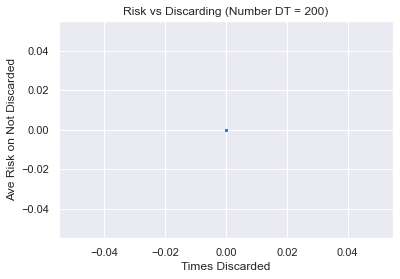

In [18]:
threshold_disc = a_op
threshold_perfo = b_op

disc_rest = sum_thdboth/(200-count_discarded_both)
import seaborn as sns

plt.scatter(x=count_discarded_both, y=disc_rest, s=1)

print('alpha: {0:0.2f}, beta: {1:0.2f}'.format(threshold_disc, threshold_perfo))
print('{0:0%} of samples discarded 200 times'.format(sum(np.isnan(disc_rest)*1)/disc_rest.shape[0]))
plt.xlabel('Times Discarded')
plt.ylabel('Ave Risk on Not Discarded')
plt.title('Risk vs Discarding (Number DT = 200)')
plt.show()

##Add some jitter

In [19]:
import dash
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px
from sklearn.manifold import TSNE

y_test = np.array(y_labels[case]['test']).flatten()
A_test = A[case]['test'].to_numpy().flatten()

#Transform coocurrenc6ies into distance. This is, the highest frequency is equal to 0 and the lowest equal to the highest value
X = datasets_tests[case]['unaware'].to_numpy()[:,:2]

#Get and transform sensitive attribute
a = A_test
a_text = ['a' if x == 1 else 'b' for x in a]

#Get and transform label
symbol = np.array(y_test).astype('str').flatten()

In [20]:
#Merge all variables into one DataFrame
data_x = pd.DataFrame(X, columns = ['dim1', 'dim2'])
data_att = pd.DataFrame(a_text, columns=['sensitive_att'])
data_y = pd.DataFrame(symbol, columns=['label'])
data_disc = pd.DataFrame(sum_thdboth/(200-count_discarded_both), columns=['risk'])

data = pd.concat([data_x, data_att, data_y, data_disc], axis=1)

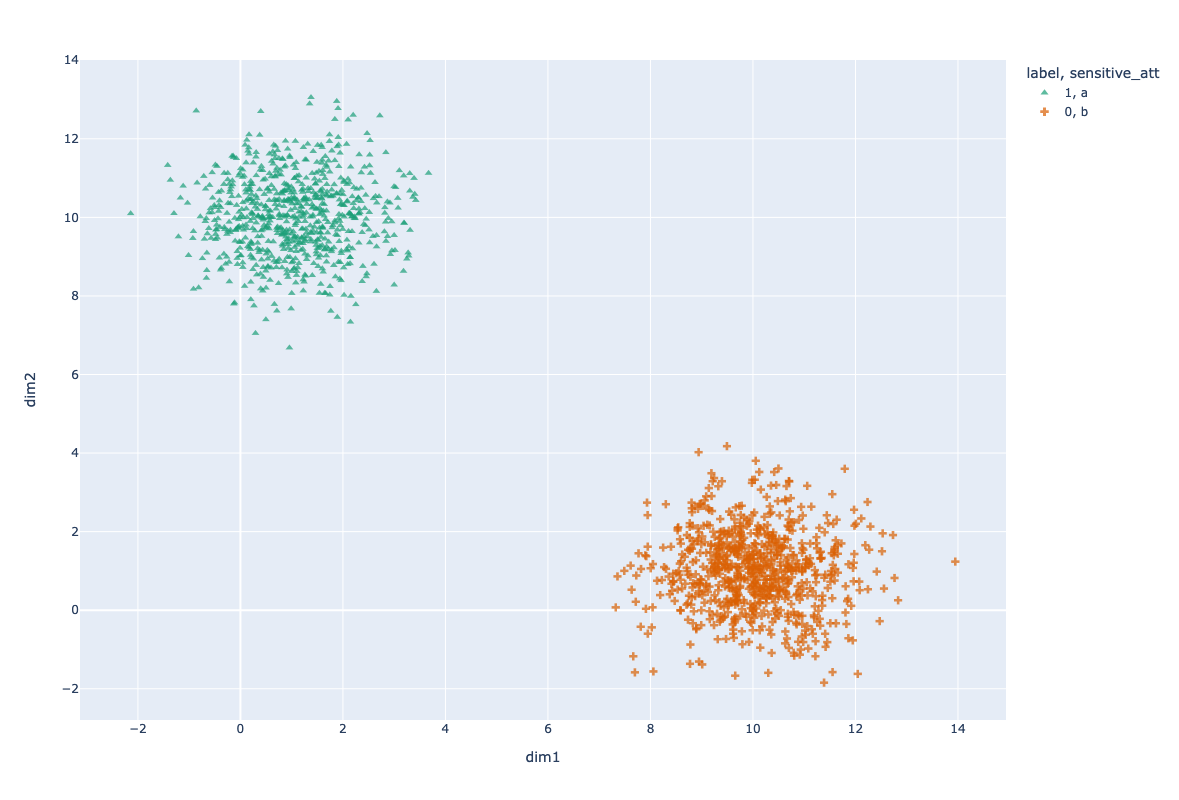

In [21]:
fig = px.scatter(data, x='dim1', y='dim2',
              color='label', symbol = 'sensitive_att', color_discrete_sequence=px.colors.qualitative.Dark2 , symbol_sequence = [5,3],  opacity=0.7, width=800, height=800) #title = case+'-Labels', 

fig.update_traces(marker = dict(size=7))

fig.show()

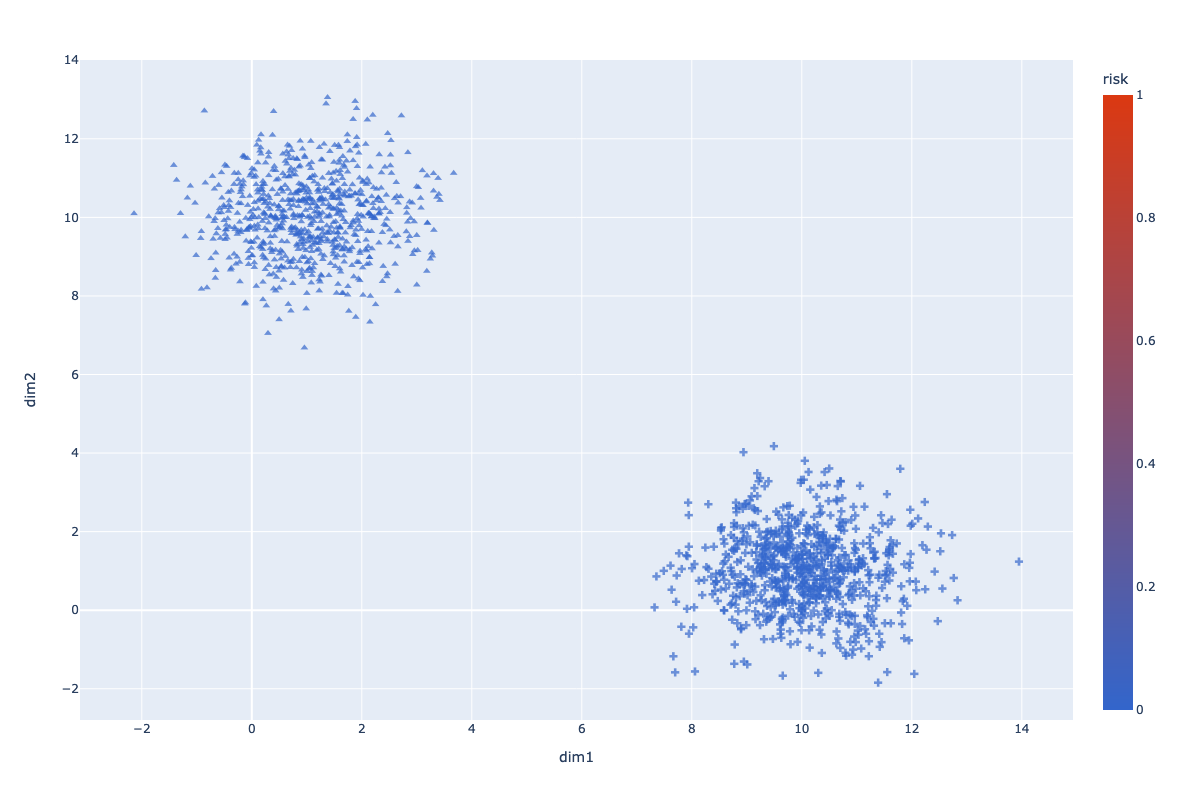

In [22]:
fig = px.scatter(data, x='dim1', y='dim2',
              color='risk', range_color=(0,1), symbol = 'sensitive_att', symbol_sequence = [5,3], color_continuous_scale =['#3366CC','#DC3912'], opacity=0.7, width=800, height=800) #title = case+'-Risk Discrimination Levels', 

fig.update_traces(marker = dict(size=7))
fig.update_layout(showlegend=False) 
fig.layout.update()

fig.show()

# Computing True Risk

I am supposed compute true risk like this:
1. Consider the following computation of risk: r(x) = |P(Y|S=0, X=x) - P(Y|S=1, X=x)|
2. Repeat a number of equals x with S flipped
3. Given an alpha ratio, change the outcome of an exact same portion.
4. Compute the risk.

## Create the computation for the true risk

In [23]:
case='case_1'

In [24]:
#Select the dataset (a shrunk)
X_true_risk = datasets_tests[case]['unaware'].to_numpy()[:,:2]
X_true_risk_shrunk = X_true_risk[(X_true_risk[:,0]>=-1) & (X_true_risk[:,0]<=3) & (X_true_risk[:,1]>=8) & (X_true_risk[:,1]<=12),:]
S_true_risk_shrunk = A[case]['test'].to_numpy().flatten()[(X_true_risk[:,0]>=-1) & (X_true_risk[:,0]<=3) & (X_true_risk[:,1]>=8) & (X_true_risk[:,1]<=12)]
Y_true_risk_shrunk = y_test = np.array(y_labels[case]['test']).flatten()[(X_true_risk[:,0]>=-1) & (X_true_risk[:,0]<=3) & (X_true_risk[:,1]>=8) & (X_true_risk[:,1]<=12)]


In [25]:
#Define functions to make replications
def makeCopies(X, y, s, n_copies):
    X_final = X.copy()
    s_final = s
    y_final = y.copy()
    
    #copies with original s
    for i in range(n_copies-1):
        X_final = np.concatenate((X_final, X.copy()), axis= 0)
        s_final = np.concatenate((s_final, s), axis = 0)
        y_final = np.concatenate((y_final, y.copy()), axis=0)
    
    #copies with S flipped
    for i in range(n_copies):
        X_final = np.concatenate((X_final, X.copy()), axis= 0)
        s_final = np.concatenate((s_final, 1-s), axis = 0)
        y_final = np.concatenate((y_final, y.copy()), axis=0)
    
    return X_final, s_final, y_final
    
def createSynthetic(X, y, s, n_copies, alpha):
    X_copy, s_copy, y_copy = makeCopies(X,y,s,n_copies)
    mid = int((X_copy.shape[0]/2))
    for i in range(mid,y_copy.shape[0]):
        r = random.random()
        if r<=alpha:
            #print('checked')
            y_copy[i] = 1-y_copy[i]
    
    return X_copy, s_copy, y_copy


In [26]:
#Make replicated dataset
datasets = {}

alpha = np.array([x/100 for x in range(0,101, 5)]).ravel()

for a in alpha:
    X_truerisk_shrunk_copy, S_truerisk_shrunk_copy, Y_truerisk_shrunk_copy = createSynthetic(X = X_true_risk_shrunk, 
                                                                                         y = Y_true_risk_shrunk, 
                                                                                         s = S_true_risk_shrunk, 
                                                                                         n_copies = 10, #this n_copies is the number of samples for each group
                                                                                             alpha = a)
    X_final = np.concatenate((X_true_risk_shrunk, X_truerisk_shrunk_copy), axis=0)
    Y_final = np.concatenate((Y_true_risk_shrunk, Y_truerisk_shrunk_copy), axis=0)
    S_final = np.concatenate((S_true_risk_shrunk, S_truerisk_shrunk_copy), axis=0)
    
    datasets['alpha_'+str(a)] = (X_final, S_final, Y_final)


In [27]:
#Compute risk for every points in the final data
def computeRisk(X_final, S_final, Y_final):
    risk = np.zeros((X_final.shape[0]))
    for x in range(X_final.shape[0]):
        s_x = S_final[x]
        dim1 = X_final[x,0]
        dim2 = X_final[x,1]
        risk[x] = abs(max(0,Y_final[(S_final==s_x) & (X_final[:,0]==dim1) & (X_final[:,1]==dim2)].mean()-
                      Y_final[(S_final==1-s_x) & (X_final[:,0]==dim1) & (X_final[:,1]==dim2)].mean()))
    return risk

In [30]:
risks_cases = {}

for d in datasets:
    X_final, S_final, Y_final = datasets[d]
    
    risk = computeRisk(X_final, S_final, Y_final)

    risks_cases[d] = risk

In [31]:
risks_cases.keys()

dict_keys(['alpha_0.0', 'alpha_0.05', 'alpha_0.1', 'alpha_0.15', 'alpha_0.2', 'alpha_0.25', 'alpha_0.3', 'alpha_0.35', 'alpha_0.4', 'alpha_0.45', 'alpha_0.5', 'alpha_0.55', 'alpha_0.6', 'alpha_0.65', 'alpha_0.7', 'alpha_0.75', 'alpha_0.8', 'alpha_0.85', 'alpha_0.9', 'alpha_0.95', 'alpha_1.0'])

In [33]:
#Run this code for storing grid results
with open('checkpoints/risk_cases.pickle', 'wb') as f:
    pickle.dump(risks_cases, f)

## Use the algorithm to estimate the risk

In [34]:
#Split the dataset into train and test
def splitTrainTest(X_final, S_final, Y_final, risk):
    dataset = np.concatenate((X_final, S_final.reshape(-1,1), risk.reshape(-1,1)), axis = 1)

    X_train, X_test, y_train, y_test = train_test_split(dataset, Y_final, test_size = 0.3, stratify= Y_final, random_state = 1)

    S_train = X_train[:,2]
    S_test = X_test[:,2]
    risk_train = X_train[:,-1]
    risk_test = X_test[:,-1]
    X_train = X_train[:,:2]
    X_test = X_test[:,:2]
    
    return X_train, S_train, y_train, risk_train, X_test, S_test, y_test, risk_test


In [35]:
X_trains = {}
S_trains = {}
y_trains = {}
risk_trains = {}

X_tests = {}
S_tests = {}
y_tests = {}
risk_tests = {}

for d in datasets:
    X_final, S_final, Y_final = datasets[d]
    risk = risks[d]
    
    X_train, S_train, y_train, risk_train, X_test, S_test, y_test, risk_test = splitTrainTest(X_final, 
                                                                                              S_final, 
                                                                                              Y_final, 
                                                                                              risk)
    
    X_trains[d] = X_train
    S_trains[d] = S_train
    y_trains[d] = y_train
    risk_trains[d] = risk_train

    X_tests[d] = X_test
    S_tests[d] = S_test
    y_tests[d] = y_test
    risk_tests[d] = risk_test

In [36]:
#Defining Models and parameters for gid
#Decision Tree
parameters = {'DT__criterion': ['gini'], 'DT__splitter': ['random'], 'DT__max_depth': [None], 'DT__min_samples_leaf': [2]}
dt = DecisionTreeClassifier(random_state=0)

dt_sample = {}

for d in datasets:
    print("Starting for..."+d)
    X = X_trains[d]
    y_labels = y_trains[d]
    
    dt_res_sample = {}
    
    for i in range(0,100):
        sel = random.choices(range(X.shape[0]), k=int(X.shape[0]*0.3))
        sel_var = random.sample(range(X.shape[1]), k = max(2,int(X.shape[1])-1))
        sel.sort()
        sel_var.sort()
        X_sample = X[sel,:][:,sel_var]
        y_sample = y_labels[sel]

        fit = op.get_grid(X_sample, y_sample, parameters, dt, 'DT', 'accuracy')

        dt_res_sample[str(i)] = (fit, sel, sel_var)
    
    dt_sample[d] = dt_res_sample
    
parameters = {'DT__class_weight': ['balanced'], 'DT__criterion': ['gini'], 'DT__splitter': ['random'], 'DT__max_depth': [None], 'DT__min_samples_leaf': [2]}
dt = DecisionTreeClassifier(random_state=0)

print()
print('Balanced')
for d in datasets:
    print("Starting for..."+d)
    X = X_trains[d]
    y_labels = y_trains[d]
    
    dt_res_sample = dt_sample[d]
    
    for i in range(0,100):
        sel = random.choices(range(X.shape[0]), k=int(X.shape[0]*0.3))
        sel_var = random.sample(range(X.shape[1]), k = max(2,int(X.shape[1])-1))
        sel.sort()
        sel_var.sort()
        X_sample = X[sel,:][:,sel_var]
        y_sample = y_labels[sel]

        fit = op.get_grid(X_sample, y_sample, parameters, dt, 'DT', 'accuracy')

        dt_res_sample['balanced_'+str(i)] = (fit, sel, sel_var)
    
    dt_sample[d] = dt_res_sample

Starting for...alpha_0.0
Starting for...alpha_0.05
Starting for...alpha_0.1
Starting for...alpha_0.15
Starting for...alpha_0.2
Starting for...alpha_0.25
Starting for...alpha_0.3
Starting for...alpha_0.35
Starting for...alpha_0.4
Starting for...alpha_0.45
Starting for...alpha_0.5
Starting for...alpha_0.55
Starting for...alpha_0.6
Starting for...alpha_0.65
Starting for...alpha_0.7
Starting for...alpha_0.75
Starting for...alpha_0.8
Starting for...alpha_0.85
Starting for...alpha_0.9
Starting for...alpha_0.95
Starting for...alpha_1.0

Balanced
Starting for...alpha_0.0
Starting for...alpha_0.05
Starting for...alpha_0.1
Starting for...alpha_0.15
Starting for...alpha_0.2
Starting for...alpha_0.25
Starting for...alpha_0.3
Starting for...alpha_0.35
Starting for...alpha_0.4
Starting for...alpha_0.45
Starting for...alpha_0.5
Starting for...alpha_0.55
Starting for...alpha_0.6
Starting for...alpha_0.65
Starting for...alpha_0.7
Starting for...alpha_0.75
Starting for...alpha_0.8
Starting for...alpha_0

In [37]:
#Run this code for storing grid results
with open('checkpoints/dt_sample.pickle', 'wb') as f:
    pickle.dump(dt_sample, f)

In [38]:
#Compute risks
#Last Version
def disc_leav(model, dataset, A, priv_class, y):
    #models: set of decision trees trained on a data train. 
    #dataset: a numpy that contains n samples of d dimension. The number of dimension should be consistent with models.
    #y: numpy size n, ground truth of each dataset.
    #A: numpy size n, membership of sensitive attribute
    #priv_class: string or value of the priviliged group in A.
    
    #Get the predictions and leave indices
    leaves = model.apply(dataset)
    y_pred = model.predict(dataset)
    
    #Compute the accuracy of dt
    f1 = fm.f1score(y, y_pred)
    
    disc_leave = []
    for leaf in np.unique(leaves):       
        misclassification_unpriv, misclassification_priv = fm.discrimanation(np.array(y[leaves==leaf]).flatten(), y_pred[leaves==leaf], np.array(A[leaves==leaf]).flatten(), priv_class= priv_class) 
        disc_leave.append((misclassification_unpriv, misclassification_priv))
    
    disc_leave = np.array(disc_leave)
    level_disc = dict(zip(np.unique(leaves), disc_leave))
    
    return f1, level_disc, leaves

def risk_number(y, A, priv_class, levels_discr, indices, leaves):
    #@Return risk discrimination level of each sample in dataset
    #dataset: a numpy that contains n samples of d dimension. The number of dimension should be consistent with models.
    #models: set of decision trees trained on a data train. 
    #y: numpy size n, ground truth of each dataset.
    #A: numpy size n, membership of sensitive attribute
    #priv_class: value, value of priviliged group
    #leaves: dictionary, leaves of each sample in dataset for each case (dt)
    #leaves_discr: dictionary, level of discrimination on each leav for each case (dt)
    #Compute the times any observation was discriminated
    
    #these two variables store the values for each classifier f (decision trees)
    r_f = {}
    n_f = {}
    
    #Computation of discrimination
    
    for index in indices:
        #These two variables store the values for each leaf of classifier f
        r_leaf = {}
        n_leaf = {}
        for leaf in levels_discr[index]:
            score = levels_discr[index][leaf]
            
            score_0 = max(0, score[0]-score[1])
            score_1 = max(0, score[1]-score[0])
                           
            #Compute the discrimination in each leaves regarding the class 
            levels_discr[index][leaf][0] = max(0, score_0-score_1)
            levels_discr[index][leaf][1] = max(0, score_1-score_0)
            
            discr = abs((1*(leaves[index]==leaf))*(1*(A==priv_class))*levels_discr[index][leaf][1]) + abs((1*(leaves[index]==leaf))*(1*(A!=priv_class))*levels_discr[index][leaf][0])
            
            if levels_discr[index][leaf][0]>0:
                n = sum((1*(leaves[index]==leaf))*(1*(A!=priv_class)))
            else:
                n = sum((1*(leaves[index]==leaf))*(1*(A==priv_class)))
            
            r_leaf[leaf] = levels_discr[index][leaf][0]+levels_discr[index][leaf][1]
            n_leaf[leaf] = n
        
        r_f[index] = r_leaf
        n_f[index] = n_leaf
        
    return r_f, n_f


def risk_disc(y, A, priv_class, levels_discr, performances, indices, leaves, alpha, beta, absolute = True):
    #@Return risk discrimination level of each sample in dataset
    #dataset: a numpy that contains n samples of d dimension. The number of dimension should be consistent with models.
    #models: set of decision trees trained on a data train. 
    #y: numpy size n, ground truth of each dataset.
    #A: numpy size n, membership of sensitive attribute
    #priv_class: value, value of priviliged group
    #leaves: dictionary, leaves of each sample in dataset for each case (dt)
    #leaves_discr: dictionary, level of discrimination on each leav for each case (dt)
    #Compute the times any observation was discriminated
    
    
    #Computation of thresholds
    threshold_disc=alpha
    
    threshold_perfo=beta
    
    
    #Computation of discrimination
    sum_total = np.zeros(y.shape[0])
    sum_thdisc = np.zeros(y.shape[0])
    sum_thdiscperfo = np.zeros(y.shape[0])
    sum_thdboth = np.zeros(y.shape[0])
    count_discarded_alpha = np.zeros(y.shape[0])
    count_discarded_beta = np.zeros(y.shape[0])
    count_discarded_both = np.zeros(y.shape[0])
    
    for index in indices:
        for leaf in levels_discr[index]:
            score = levels_discr[index][leaf]
            
            score_0 = max(0, score[0]-score[1])
            score_1 = max(0, score[1]-score[0])
                           
            #Compute the discrimination in each leaves regarding the class 
            levels_discr[index][leaf][0] = max(0, score_0-score_1)
            levels_discr[index][leaf][1] = max(0, score_1-score_0)
            
            discr = abs((1*(leaves[index]==leaf))*(1*(A==priv_class))*levels_discr[index][leaf][1]) + abs((1*(leaves[index]==leaf))*(1*(A!=priv_class))*levels_discr[index][leaf][0])
            
            sum_total+=discr
            
            if sum(1*(levels_discr[index][leaf]>=threshold_disc))>0:
                sum_thdisc += discr
            else:
                count_discarded_alpha += 1*(leaves[index]==leaf)
            
            if performances[index]>=threshold_perfo:
                sum_thdiscperfo += discr
            else:
                count_discarded_beta += 1*(leaves[index]==leaf)
                
            if sum(1*(levels_discr[index][leaf]>=threshold_disc))>0:
                if performances[index]>=threshold_perfo:
                    sum_thdboth += discr
                else:
                    count_discarded_both += 1*(leaves[index]==leaf)
            else:
                count_discarded_both += 1*(leaves[index]==leaf)
    
    return sum_total, sum_thdisc, sum_thdiscperfo, sum_thdboth, count_discarded_alpha, count_discarded_beta, count_discarded_both, threshold_disc, threshold_perfo

def findParameters(alpha_lim, beta_lim, steps_alpha, steps_beta,threshold, **kargs):
    #**kargs should provide y, leaves_discr, performances, indices, leaves
    """
    It returns the thresholds for alpha and beta
    Input:
    - threshold: int, number of minimal counts in the leaves
    """
    a_op = 0
    b_op = 0
    for a in np.arange(0, alpha_lim, steps_alpha):
        _, _, _, _, count_discarded_alpha, _, count_discarded_both, _, _ = risk_disc(alpha=a, beta=b_op, **kargs)
        if 200-max(count_discarded_alpha)<threshold: #the 200 should be change in the future
            break
        else: a_op = a
        
    for b in np.arange(0, beta_lim, steps_beta):
        _, _, _, _, _, count_discarded_beta, count_discarded_both, _, _ = risk_disc(alpha=a_op, beta=b, **kargs)
        if 200-max(count_discarded_beta)<threshold: #the 200 should be change in the future
            break
        else: b_op = b        
    
    if a_op == alpha_lim or b_op==beta_lim: print('One of the limits was reached...')
    return a_op, b_op

In [39]:
#Computing for the entire dataset in order to obtain alpha and beta optimal.
#Note that for alpha and beta optimal we are using the training data set

import warnings
warnings.filterwarnings('ignore')

indices_cases = {}
performances_cases = {}
levels_discr_cases = {}
leaves_cases = {}
r_f_cases = {}
n_f_cases = {}

for case in datasets:
    print('case: '+case)
    #risk_tests[d] = risk_test
    y_train = y_trains[case]
    A_train = S_trains[case]
    priv_class = 1
    datatest = X_trains[case]

    indices = []
    performances = []
    levels_discr = {}
    leaves = {}

    print('computing discrimination and performances...')
    for dt in dt_sample[case]:
        grid_model, sel, sel_var = dt_sample[case][dt]
        X = datatest[:,sel_var]

        #Get the predictions and leaves indices
        perfo, level_disc, leaves_disc = disc_leav(grid_model.best_estimator_['DT'], 
                                                   X, 
                                                   A_train, 
                                                   priv_class, 
                                                   y_train)

        leaves[dt] = leaves_disc
        levels_discr[dt] = level_disc
        performances.append(perfo)
        indices.append(dt)

    indices = np.array(indices)
    performances = dict(zip(indices, performances))
    
    r_f, n_f = risk_number(y_train, A_train, priv_class, levels_discr, indices, leaves)
        
    print('Saving results')
    indices_cases[case] = indices
    performances_cases[case] = performances
    levels_discr_cases[case] = levels_discr
    leaves_cases[case] = leaves
    r_f_cases[case] = r_f
    n_f_cases[case] = n_f

case: alpha_0.0
computing discrimination and performances...
Saving results
case: alpha_0.05
computing discrimination and performances...
Saving results
case: alpha_0.1
computing discrimination and performances...
Saving results
case: alpha_0.15
computing discrimination and performances...
Saving results
case: alpha_0.2
computing discrimination and performances...
Saving results
case: alpha_0.25
computing discrimination and performances...
Saving results
case: alpha_0.3
computing discrimination and performances...
Saving results
case: alpha_0.35
computing discrimination and performances...
Saving results
case: alpha_0.4
computing discrimination and performances...
Saving results
case: alpha_0.45
computing discrimination and performances...
Saving results
case: alpha_0.5
computing discrimination and performances...
Saving results
case: alpha_0.55
computing discrimination and performances...
Saving results
case: alpha_0.6
computing discrimination and performances...
Saving results
case: 

In [40]:
#Run this code for storing grid results
with open('checkpoints/indices_cases.pickle', 'wb') as f:
    pickle.dump(indices_cases, f)
    
with open('checkpoints/performances_cases.pickle', 'wb') as f:
    pickle.dump(performances_cases, f)
    
with open('checkpoints/levels_discr_cases.pickle', 'wb') as f:
    pickle.dump(levels_discr_cases, f)
    
with open('checkpoints/leaves_cases.pickle', 'wb') as f:
    pickle.dump(leaves_cases, f)
    
with open('checkpoints/r_f_cases.pickle', 'wb') as f:
    pickle.dump(r_f_cases, f)
    
with open('checkpoints/n_f_cases.pickle', 'wb') as f:
    pickle.dump(n_f_cases, f)

In [41]:
sum_r_times_n_cases = {}
for alpha in r_f_cases:
    classifiers = r_f_cases[alpha]
    sum_r_times_n = 0
    for f in classifiers:
        leaves = classifiers[f]
        for leaf in leaves:
            sum_r_times_n += leaves[leaf]*n_f_cases[alpha][f][leaf]
    sum_r_times_n_cases[alpha] = sum_r_times_n
    print('Done '+alpha)

Done alpha_0.0
Done alpha_0.05
Done alpha_0.1
Done alpha_0.15
Done alpha_0.2
Done alpha_0.25
Done alpha_0.3
Done alpha_0.35
Done alpha_0.4
Done alpha_0.45
Done alpha_0.5
Done alpha_0.55
Done alpha_0.6
Done alpha_0.65
Done alpha_0.7
Done alpha_0.75
Done alpha_0.8
Done alpha_0.85
Done alpha_0.9
Done alpha_0.95
Done alpha_1.0


In [42]:
#Computiong the optimal alpha and beta according to Lagrange Multiplier
#First, set the number of maximal discards
d = 0

alpha_optimal = {}
beta_optimal = {}

N = y_test.shape[0]
F = 200 #len(train_models['DT_sample']['case_1'].keys())

def getSumR(r_f):
    total = 0
    count = 0
    for f in r_f:
        for l in r_f[f]:
            total+=r_f[f][l]
            count+=1
    return total/count
    
for alpha in datasets:
    #get the performances for the case of alpha
    performances = performances_cases[alpha]
    #compute sum_E
    sum_E = sum([1-performances[e] for e in performances])
    #compute beta_optimal
    beta_optimal[alpha] = 1-(sum_E-d)/F #min(1,max(0,1-(sum_E-d)/F))

    #computing alpha optimal
    r_total = getSumR(r_f_cases[alpha])
    alpha_optimal[alpha] = r_total #min(1,max(0,d/F+sum_r_times_n_cases[alpha]/(N*F)))
    
    

In [43]:
alpha_optimal

{'alpha_0.0': 0.0,
 'alpha_0.05': 0.07484490855609806,
 'alpha_0.1': 0.11884153498577048,
 'alpha_0.15': 0.17130043818182436,
 'alpha_0.2': 0.21831213404401137,
 'alpha_0.25': 0.2717747398378776,
 'alpha_0.3': 0.31250267188171404,
 'alpha_0.35': 0.3552297497048328,
 'alpha_0.4': 0.4014052085784075,
 'alpha_0.45': 0.46663749516982617,
 'alpha_0.5': 0.5112835076658275,
 'alpha_0.55': 0.5509597824304916,
 'alpha_0.6': 0.6113360133725803,
 'alpha_0.65': 0.6638683103545053,
 'alpha_0.7': 0.7049231476393703,
 'alpha_0.75': 0.7438661671236348,
 'alpha_0.8': 0.8064754397808886,
 'alpha_0.85': 0.8534570933005915,
 'alpha_0.9': 0.8978183000487232,
 'alpha_0.95': 0.9543018680953006,
 'alpha_1.0': 1.0}

In [44]:
beta_optimal

{'alpha_0.0': 1.0,
 'alpha_0.05': 0.9637967839361503,
 'alpha_0.1': 0.931176490647936,
 'alpha_0.15': 0.8959825504358956,
 'alpha_0.2': 0.8581678796812937,
 'alpha_0.25': 0.8276695529591748,
 'alpha_0.3': 0.8032517040554753,
 'alpha_0.35': 0.7849983291914292,
 'alpha_0.4': 0.7642007122166687,
 'alpha_0.45': 0.7465052341483277,
 'alpha_0.5': 0.7196494916747025,
 'alpha_0.55': 0.7200151805837263,
 'alpha_0.6': 0.6884351509340454,
 'alpha_0.65': 0.6609614290300421,
 'alpha_0.7': 0.6502867695432852,
 'alpha_0.75': 0.641129701085414,
 'alpha_0.8': 0.6042574247786455,
 'alpha_0.85': 0.5875305178278487,
 'alpha_0.9': 0.5658800926635159,
 'alpha_0.95': 0.5327224898013967,
 'alpha_1.0': 0.4983715239926242}

In [45]:
with open('checkpoints/alpha_optimal.pickle', 'wb') as f:
    pickle.dump(alpha_optimal, f)
    
with open('checkpoints/beta_optimal.pickle', 'wb') as f:
    pickle.dump(beta_optimal, f)

In [46]:
#Computing for the entire dataset in order to obtain alpha and beta optimal.
#In this case we are using test dataset

import warnings
warnings.filterwarnings('ignore')

indices_cases_test = {}
performances_cases_test = {}
levels_discr_cases_test = {}
leaves_cases_test = {}
r_f_cases_test = {}
n_f_cases_test = {}

for case in datasets:
    print('case: '+case)
    #risk_tests[d] = risk_test
    y_test = y_tests[case]
    A_test = S_tests[case]
    priv_class = 1
    datatest = X_tests[case]

    indices = []
    performances = []
    levels_discr = {}
    leaves = {}

    print('computing discrimination and performances...')
    for dt in dt_sample[case]:
        grid_model, sel, sel_var = dt_sample[case][dt]
        X = datatest[:,sel_var]

        #Get the predictions and leaves indices
        perfo, level_disc, leaves_disc = disc_leav(grid_model.best_estimator_['DT'], 
                                                   X, 
                                                   A_test, 
                                                   priv_class, 
                                                   y_test)

        leaves[dt] = leaves_disc
        levels_discr[dt] = level_disc
        performances.append(perfo)
        indices.append(dt)

    indices = np.array(indices)
    performances = dict(zip(indices, performances))
    
    r_f, n_f = risk_number(y_test, A_test, priv_class, levels_discr, indices, leaves)
    
    print('Saving results')
    indices_cases_test[case] = indices
    performances_cases_test[case] = performances
    levels_discr_cases_test[case] = levels_discr
    leaves_cases_test[case] = leaves
    r_f_cases_test[case] = r_f
    n_f_cases_test[case] = n_f

case: alpha_0.0
computing discrimination and performances...
Saving results
case: alpha_0.05
computing discrimination and performances...
Saving results
case: alpha_0.1
computing discrimination and performances...
Saving results
case: alpha_0.15
computing discrimination and performances...
Saving results
case: alpha_0.2
computing discrimination and performances...
Saving results
case: alpha_0.25
computing discrimination and performances...
Saving results
case: alpha_0.3
computing discrimination and performances...
Saving results
case: alpha_0.35
computing discrimination and performances...
Saving results
case: alpha_0.4
computing discrimination and performances...
Saving results
case: alpha_0.45
computing discrimination and performances...
Saving results
case: alpha_0.5
computing discrimination and performances...
Saving results
case: alpha_0.55
computing discrimination and performances...
Saving results
case: alpha_0.6
computing discrimination and performances...
Saving results
case: 

In [47]:
#Run this code for storing grid results
with open('checkpoints/indices_cases_test.pickle', 'wb') as f:
    pickle.dump(indices_cases_test, f)
    
with open('checkpoints/performances_cases_test.pickle', 'wb') as f:
    pickle.dump(performances_cases_test, f)
    
with open('checkpoints/levels_discr_cases_test.pickle', 'wb') as f:
    pickle.dump(levels_discr_cases_test, f)
    
with open('checkpoints/leaves_cases_test.pickle', 'wb') as f:
    pickle.dump(leaves_cases_test, f)
    
with open('checkpoints/r_f_cases_test.pickle', 'wb') as f:
    pickle.dump(r_f_cases_test, f)
    
with open('checkpoints/n_f_cases_test.pickle', 'wb') as f:
    pickle.dump(n_f_cases_test, f)

In [385]:
#Computiong the optimal alpha and beta according to Lagrange Multiplier
#First, set the number of maximal discards
d = 0

alpha_optimal = {}
beta_optimal = {}

N = y_test.shape[0]
F = 200 #len(train_models['DT_sample']['case_1'].keys())

def getSumR(r_f):
    total = 0
    count = 0
    for f in r_f:
        for l in r_f[f]:
            total+=r_f[f][l]
            count+=1
    return total/count
    
for alpha in datasets:
    #get the performances for the case of alpha
    performances = performances_cases_test[alpha]
    #compute sum_E
    sum_E = sum([1-performances[e] for e in performances])
    #compute beta_optimal
    beta_optimal[alpha] = 1-(sum_E-d)/F #min(1,max(0,1-(sum_E-d)/F))

    #computing alpha optimal
    r_total = getSumR(r_f_cases_test[alpha])
    alpha_optimal[alpha] = r_total #min(1,max(0,d/F+sum_r_times_n_cases[alpha]/(N*F)))
    

In [388]:
results = {}

for alpha in datasets:
    print('Running for alpha: '+str(alpha))
    y_test = y_tests[alpha]
    A_test = S_tests[alpha]
    priv_class = 1
    levels_discr = levels_discr_cases_test[alpha]
    performances = performances_cases_test[alpha]
    indices = indices_cases_test[alpha]
    leaves = leaves_cases_test[alpha]
    
    a_op=alpha_optimal[alpha]
    b_op=beta_optimal[alpha]

    sum_total, sum_thdisc, sum_thdiscperfo, sum_thdboth, count_discarded_alpha, count_discarded_beta, count_discarded_both, threshold_disc, threshold_perf = risk_disc(y=y_test, A=A_test, priv_class=priv_class, levels_discr=levels_discr, performances=performances, indices=indices, leaves=leaves, alpha=a_op, beta=b_op)
    results[alpha] = (sum_total, sum_thdisc, sum_thdiscperfo, sum_thdboth, count_discarded_alpha, count_discarded_beta, count_discarded_both, threshold_disc, threshold_perf)
    

Running for alpha: alpha_0.0
Running for alpha: alpha_0.05
Running for alpha: alpha_0.1
Running for alpha: alpha_0.15
Running for alpha: alpha_0.2
Running for alpha: alpha_0.25
Running for alpha: alpha_0.3
Running for alpha: alpha_0.35
Running for alpha: alpha_0.4
Running for alpha: alpha_0.45
Running for alpha: alpha_0.5
Running for alpha: alpha_0.55
Running for alpha: alpha_0.6
Running for alpha: alpha_0.65
Running for alpha: alpha_0.7
Running for alpha: alpha_0.75
Running for alpha: alpha_0.8
Running for alpha: alpha_0.85
Running for alpha: alpha_0.9
Running for alpha: alpha_0.95
Running for alpha: alpha_1.0


In [48]:
MSE = []
RMSE = []
true_risk_mean = []
estimate_risk_mean = []
alphas = []

for alpha in results:
    sum_total, sum_thdisc, sum_thdiscperfo, sum_thdboth, count_discarded_alpha, count_discarded_beta, count_discarded_both, threshold_disc, threshold_perf = results[alpha]
    risk = risk_tests[alpha]
    
    risk_estimation = np.nan_to_num(sum_thdboth/(200-count_discarded_both),0)
    
    mse = sum((risk_estimation-risk)**2)/risk.shape[0]
    rmse = mse**(1/2)
    
    MSE.append(mse)
    RMSE.append(rmse)
    true_risk_mean.append(risk.mean())
    estimate_risk_mean.append(risk_estimation.mean())
    alphas.append(float(alpha[6:]))
    
    print('for {0}, MSE: {1}, RMSE: {2}'.format(alpha, mse, rmse))
    
MSE = np.array(MSE)
RMSE = np.array(RMSE)

NameError: name 'results' is not defined

In [413]:
MSE = []
RMSE = []
true_risk_mean = []
estimate_risk_mean = []
alphas = []

for alpha in results:
    sum_total, sum_thdisc, sum_thdiscperfo, sum_thdboth, count_discarded_alpha, count_discarded_beta, count_discarded_both, threshold_disc, threshold_perf = results[alpha]
    risk = risk_tests[alpha]
    
    risk_estimation = np.nan_to_num(sum_thdboth/(200-count_discarded_both),0)
    
    mse = sum((risk_estimation-risk)**2)/risk.shape[0]
    rmse = mse**(1/2)
    
    MSE.append(mse)
    RMSE.append(rmse)
    true_risk_mean.append(risk.mean())
    estimate_risk_mean.append(risk_estimation.mean())
    alphas.append(float(alpha[6:]))
    
    print('for {0}, MSE: {1}, RMSE: {2}'.format(alpha, mse, rmse))
    
MSE = np.array(MSE)
RMSE = np.array(RMSE)

for alpha_0.0, MSE: 0.0, RMSE: 0.0
for alpha_0.05, MSE: 0.010760509004576405, RMSE: 0.10373287330724242
for alpha_0.1, MSE: 0.023242489530380363, RMSE: 0.1524548770304852
for alpha_0.15, MSE: 0.04381590741926821, RMSE: 0.2093224962092422
for alpha_0.2, MSE: 0.07368094970457499, RMSE: 0.2714423506098026
for alpha_0.25, MSE: 0.10207863203494272, RMSE: 0.3194974679632731
for alpha_0.3, MSE: 0.12219228615521596, RMSE: 0.3495601323881429
for alpha_0.35, MSE: 0.15576811995711348, RMSE: 0.3946747014404565
for alpha_0.4, MSE: 0.18253262803743336, RMSE: 0.42723837378848983
for alpha_0.45, MSE: 0.1989223448202101, RMSE: 0.4460071129704212
for alpha_0.5, MSE: 0.24376926102077764, RMSE: 0.4937299474619477
for alpha_0.55, MSE: 0.24938925057103345, RMSE: 0.4993888770998343
for alpha_0.6, MSE: 0.2645994265249114, RMSE: 0.5143922885550594
for alpha_0.65, MSE: 0.2738956395174928, RMSE: 0.5233503984115162
for alpha_0.7, MSE: 0.28619746758081305, RMSE: 0.5349742681483036
for alpha_0.75, MSE: 0.2875369585

In [49]:
values = [0.0, 0.25, 0.5, 0.75, 1.0]

results_a = {}
results_b = {}

print('Runing for ases')
for a in values:
    results = {}
    print('Running for a: '+str(a))
    for alpha in datasets:
        y_test = y_tests[alpha]
        A_test = S_tests[alpha]
        priv_class = 1
        levels_discr = levels_discr_cases_test[alpha]
        performances = performances_cases_test[alpha]
        indices = indices_cases_test[alpha]
        leaves = leaves_cases_test[alpha]

        a_op=a
        b_op=0

        sum_total, sum_thdisc, sum_thdiscperfo, sum_thdboth, count_discarded_alpha, count_discarded_beta, count_discarded_both, threshold_disc, threshold_perf = risk_disc(y=y_test, A=A_test, priv_class=priv_class, levels_discr=levels_discr, performances=performances, indices=indices, leaves=leaves, alpha=a_op, beta=b_op)
        results[alpha] = (sum_total, sum_thdisc, sum_thdiscperfo, sum_thdboth, count_discarded_alpha, count_discarded_beta, count_discarded_both, threshold_disc, threshold_perf)
    
    results_a[a] = results

for b in values:
    results = {}
    print('Running for b: '+str(b))
    for alpha in datasets:
        y_test = y_tests[alpha]
        A_test = S_tests[alpha]
        priv_class = 1
        levels_discr = levels_discr_cases_test[alpha]
        performances = performances_cases_test[alpha]
        indices = indices_cases_test[alpha]
        leaves = leaves_cases_test[alpha]

        a_op=0
        b_op=b

        sum_total, sum_thdisc, sum_thdiscperfo, sum_thdboth, count_discarded_alpha, count_discarded_beta, count_discarded_both, threshold_disc, threshold_perf = risk_disc(y=y_test, A=A_test, priv_class=priv_class, levels_discr=levels_discr, performances=performances, indices=indices, leaves=leaves, alpha=a_op, beta=b_op)
        results[alpha] = (sum_total, sum_thdisc, sum_thdiscperfo, sum_thdboth, count_discarded_alpha, count_discarded_beta, count_discarded_both, threshold_disc, threshold_perf)
    
    results_b[b] = results

Runing for ases
Running for a: 0.0
Running for a: 0.25
Running for a: 0.5
Running for a: 0.75
Running for a: 1.0
Running for b: 0.0
Running for b: 0.25
Running for b: 0.5
Running for b: 0.75
Running for b: 1.0


In [50]:
#Run this code for storing grid results
with open('checkpoints/results_a.pickle', 'wb') as f:
    pickle.dump(results_a, f)
    
with open('checkpoints/results_b.pickle', 'wb') as f:
    pickle.dump(results_b, f)
    

In [251]:
values = [0.0, 0.25, 0.5, 0.75, 1.0]
MSE_a = {}
RMSE_a = {}
true_risk_mean_a = {}
estimate_risk_mean_a = {}
alphas_a = {}

for ases in values:
    MSE = []
    RMSE = []
    true_risk_mean = []
    estimate_risk_mean = []
    alphas = []
    
    for alpha in results_a[ases]:
        sum_total, sum_thdisc, sum_thdiscperfo, sum_thdboth, count_discarded_alpha, count_discarded_beta, count_discarded_both, threshold_disc, threshold_perf = results_a[ases][alpha]
        risk = risk_tests[alpha]

        risk_estimation = np.nan_to_num(sum_thdboth/(200-count_discarded_both),0)

        mse = sum((risk_estimation-risk)**2)/risk.shape[0]
        rmse = mse**(1/2)

        MSE.append(mse)
        RMSE.append(rmse)
        true_risk_mean.append(risk.mean())
        estimate_risk_mean.append(risk_estimation.mean())
        alphas.append(float(alpha[6:]))

        #print('for {0}, MSE: {1}, RMSE: {2}'.format(alpha, mse, rmse))
    
    MSE = np.array(MSE)
    RMSE = np.array(RMSE)

    MSE_a[ases] = MSE
    RMSE_a[ases] = RMSE
    true_risk_mean_a[ases] = true_risk_mean
    estimate_risk_mean_a[ases] = estimate_risk_mean
    alphas_a[ases] = alphas
    

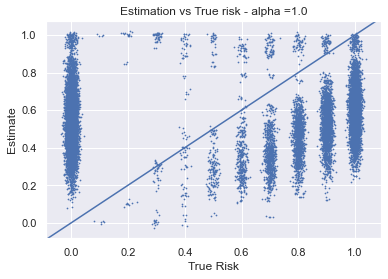

In [231]:
values = [1.0]
mean_a = {}
true_risk_mean_a = {}
estimate_risk_mean_a = {}
alphas_a = {}

def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def jitter(x, y, s=.5, c='b', marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, **kwargs):
    return plt.scatter(rand_jitter(x), rand_jitter(y), s=s, c=c, marker=marker, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths, **kwargs)

for ases in values:
    MSE = []
    RMSE = []
    true_risk_mean = []
    estimate_risk_mean = []
    alphas = []
    
    for alpha in results_a[ases]:
        sum_total, sum_thdisc, sum_thdiscperfo, sum_thdboth, count_discarded_alpha, count_discarded_beta, count_discarded_both, threshold_disc, threshold_perf = results_a[ases][alpha]
        risk = risk_tests[alpha]

        risk_estimation = sum_thdboth/(200-count_discarded_both)

        jitter(risk, risk_estimation)
        

plt.xlabel('True Risk')
plt.ylabel('Estimate')
plt.title('Estimation vs True risk - alpha ='+str(ases))
plt.axline([0, 0], [1, 1])
plt.show()

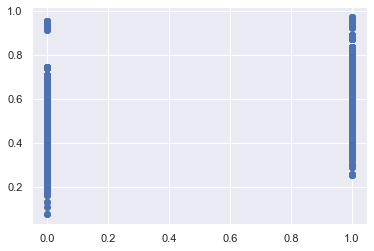

In [96]:
alpha='alpha_1.0'
ases = 0.75
sum_total, sum_thdisc, sum_thdiscperfo, sum_thdboth, count_discarded_alpha, count_discarded_beta, count_discarded_both, threshold_disc, threshold_perf = results_a[ases][alpha]
risk = risk_tests[alpha]

risk_estimation = sum_thdboth/(200-count_discarded_both)

plt.scatter(risk, risk_estimation, label = 'alpha: '+str(ases))

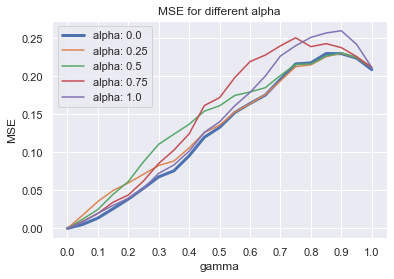

In [253]:
for ases in MSE_a:
    MSE = MSE_a[ases]
    if ases == 0.0:
        plt.plot(MSE, label = 'alpha: '+str(ases), linewidth = 3)
    else:
        plt.plot(MSE, label = 'alpha: '+str(ases))
    
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], alphas[0:21:2])
plt.title('MSE for different alpha')
plt.xlabel('gamma')
plt.ylabel('MSE')
plt.legend()
plt.show()


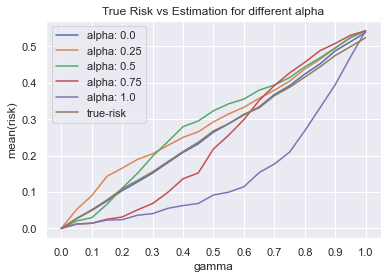

In [459]:
for ases in true_risk_mean_a:
    true_risk_mean = true_risk_mean_a[ases]
    estimate_risk_mean = estimate_risk_mean_a[ases]
    plt.plot(estimate_risk_mean, label = 'alpha: '+str(ases))
    plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], alphas[0:21:2])   

plt.plot(true_risk_mean, label = 'true-risk')
plt.xlabel('gamma')
plt.ylabel('mean(risk)')
plt.legend()
plt.title('True Risk vs Estimation for different alpha')
plt.show()

In [203]:
values = [0.0, 0.25, 0.5, 0.75, 1.0]
MSE_b = {}
RMSE_b = {}
true_risk_mean_b = {}
estimate_risk_mean_b = {}
alphas_b = {}

for bases in values:
    MSE = []
    RMSE = []
    true_risk_mean = []
    estimate_risk_mean = []
    alphas = []
    
    for alpha in results_b[bases]:
        sum_total, sum_thdisc, sum_thdiscperfo, sum_thdboth, count_discarded_alpha, count_discarded_beta, count_discarded_both, threshold_disc, threshold_perf = results_b[bases][alpha]
        risk = risk_tests[alpha]

        risk_estimation = sum_thdboth/(200-count_discarded_both)
        
        risk_filter = risk[list(np.isnan(risk_estimation)==False)]
        risk_estimation_filter = risk_estimation[list(np.isnan(risk_estimation)==False)]
        
        mse = sum((risk_estimation-risk)**2)/risk.shape[0]
        rmse = mse**(1/2)

        MSE.append(mse)
        RMSE.append(rmse)
        true_risk_mean.append(risk.mean())
        estimate_risk_mean.append(risk_estimation.mean())
        alphas.append(float(alpha[6:]))

        #print('for {0}, MSE: {1}, RMSE: {2}'.format(alpha, mse, rmse))
    
    MSE = np.array(MSE)
    RMSE = np.array(RMSE)

    MSE_b[bases] = MSE
    RMSE_b[bases] = RMSE
    true_risk_mean_b[bases] = true_risk_mean
    estimate_risk_mean_b[bases] = estimate_risk_mean
    alphas_b[bases] = alphas
    

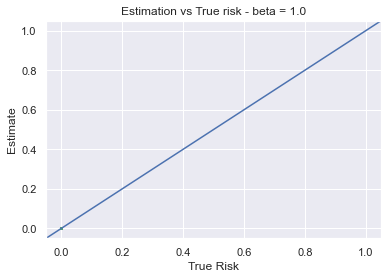

In [236]:
values = [1.0]

def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def jitter(x, y, s=.5, c='g', marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, **kwargs):
    return plt.scatter(rand_jitter(x), rand_jitter(y), s=s, c=c, marker=marker, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths, **kwargs)


for bases in values:
    MSE = []
    RMSE = []
    true_risk_mean = []
    estimate_risk_mean = []
    alphas = []
    
    for alpha in results_b[bases]:
        sum_total, sum_thdisc, sum_thdiscperfo, sum_thdboth, count_discarded_alpha, count_discarded_beta, count_discarded_both, threshold_disc, threshold_perf = results_b[bases][alpha]
        risk = risk_tests[alpha]

        risk_estimation = sum_thdboth/(200-count_discarded_both)

        jitter(risk, risk_estimation)
        

plt.xlabel('True Risk')
plt.ylim([-0.05, 1.05])
plt.xlim([-0.05, 1.05])
plt.axline([0, 0], [1, 1])
plt.ylabel('Estimate')
plt.title('Estimation vs True risk - beta = '+str(bases))
plt.show()

In [222]:
sum_total, sum_thdisc, sum_thdiscperfo, sum_thdboth, count_discarded_alpha, count_discarded_beta, count_discarded_both, threshold_disc, threshold_perf = results_b[0]['alpha_1.0']
risk = risk_tests[alpha]

risk_estimation = sum_thdboth/(200-count_discarded_both)

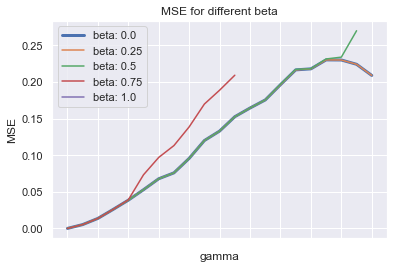

In [245]:
for bases in MSE_b:
    MSE = MSE_b[bases]
    if bases == 0.0:
        plt.plot(MSE, label = 'beta: '+str(bases), linewidth=3)
    else:
        plt.plot(MSE, label = 'beta: '+str(bases))

plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], alphas[0:21:2])
plt.title('MSE for different beta')
plt.xlabel('gamma')
plt.ylabel('MSE')
plt.legend()
plt.show()


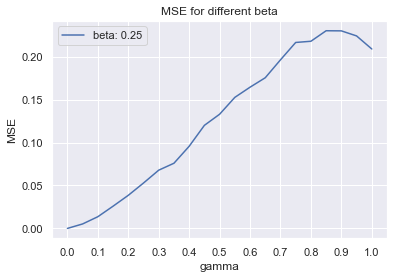

In [210]:
for bases in MSE_b:
    if bases == 0.25:
        MSE = MSE_b[bases]
        plt.plot(MSE, label = 'beta: '+str(bases))

plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], alphas[0:21:2])
plt.title('MSE for different beta')
plt.xlabel('gamma')
plt.ylabel('MSE')
plt.legend()
plt.show()


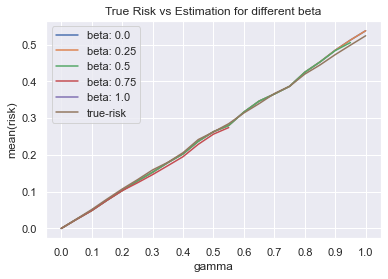

In [207]:
for bases in true_risk_mean_b:
    true_risk_mean = true_risk_mean_b[bases]
    estimate_risk_mean = estimate_risk_mean_b[bases]
    plt.plot(estimate_risk_mean, label = 'beta: '+str(bases))
    plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], alphas[0:21:2])   

plt.plot(true_risk_mean, label = 'true-risk')
plt.xlabel('gamma')
plt.ylabel('mean(risk)')
plt.legend()
plt.title('True Risk vs Estimation for different beta')
plt.show()

In [445]:
true_risk_mean_b[0.5]

[0.0,
 0.026688102893890668,
 0.05119430408819475,
 0.07806614607257693,
 0.10858980248047771,
 0.13169499310978414,
 0.155351401010565,
 0.1834634818557648,
 0.21127698667891592,
 0.2366100137804318,
 0.2678226917776757,
 0.2879191548001837,
 0.3133899862195682,
 0.3311208084519981,
 0.36456132292145155,
 0.38780431786862657,
 0.4154800183739091,
 0.44391364262746896,
 0.47496554892053283,
 0.49912723932016545,
 0.5238860817638953]

In [446]:
estimate_risk_mean_b[0.5]

[0.0,
 0.026942445616728695,
 0.0493984110518678,
 0.07530382171167564,
 0.10382133825549612,
 0.12740324049693574,
 0.1520723382597206,
 0.18064287514444655,
 0.20869323544930024,
 0.23233826043452663,
 0.2644420611876963,
 0.2874906910644915,
 0.31160759106978025,
 0.3337106070775194,
 0.3675982752879013,
 0.39204246865498593,
 0.42378335635426256,
 0.4517848652922741,
 0.486626119464872,
 0.5050834709553703,
 0.0]

In [575]:
MSE = []
RMSE = []
true_risk_mean = []
estimate_risk_mean = []
alphas = []

for alpha in results:
    sum_total, sum_thdisc, sum_thdiscperfo, sum_thdboth, count_discarded_alpha, count_discarded_beta, count_discarded_both, threshold_disc, threshold_perf = results[alpha]
    risk = risk_tests[alpha]
    
    risk_estimation = sum_thdboth/(200-count_discarded_both)
    
    mse = sum((risk_estimation-risk)**2)/risk.shape[0]
    rmse = mse**(1/2)
    
    MSE.append(mse)
    RMSE.append(rmse)
    true_risk_mean.append(risk.mean())
    estimate_risk_mean.append(risk_estimation.mean())
    alphas.append(float(alpha[6:]))
    
    print('for {0}, MSE: {1}, RMSE: {2}'.format(alpha, mse, rmse))
    
MSE = np.array(MSE)
RMSE = np.array(RMSE)

for alpha_0.0, MSE: 0.0
for alpha_0.05, MSE: 0.00434105998392075
for alpha_0.1, MSE: 0.013814286184399234
for alpha_0.15, MSE: 0.024868360663397676
for alpha_0.2, MSE: 0.039437313603074134
for alpha_0.25, MSE: 0.052987194721905766
for alpha_0.3, MSE: 0.06594230822375523
for alpha_0.35, MSE: 0.08317375100266453
for alpha_0.4, MSE: 0.0938494412499074
for alpha_0.45, MSE: 0.11631632773975865
for alpha_0.5, MSE: 0.1301506460457726
for alpha_0.55, MSE: 0.15104503960578977
for alpha_0.6, MSE: 0.1658837390083778
for alpha_0.65, MSE: 0.16952652448368677
for alpha_0.7, MSE: 0.1973619784025447
for alpha_0.75, MSE: 0.2185607395009131
for alpha_0.8, MSE: 0.22159193826098933
for alpha_0.85, MSE: 0.23079438884451517
for alpha_0.9, MSE: 0.23089938484361225
for alpha_0.95, MSE: 0.22583774213485047
for alpha_1.0, MSE: 0.21172215204409714


In [609]:
selected = []
for i in range(0,21):
    selected.append(int(i))
selected = np.array(selected)

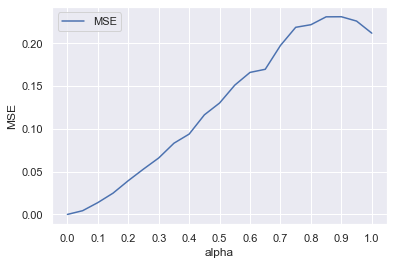

In [629]:
plt.plot(MSE, label = 'MSE')
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], alphas[0:21:2])
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()
plt.show()

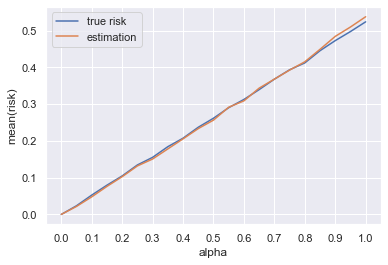

In [632]:
plt.plot(true_risk_mean, label = 'true risk')
plt.plot(estimate_risk_mean, label = 'estimation')
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], alphas[0:21:2])
plt.xlabel('alpha')
plt.ylabel('mean(risk)')
plt.legend()
plt.show()

# Comparing Risk Identification with ML models
Now, let train ML classifiers and analyze how the risk computations relate to the final models.

In [609]:
def estimatingFM(sub_sample_size, num_rep, fm_function, **kwargs):
    #@Returns the average and std of fairness metric estimation in the given data
    #Arg:
    #   fm_function: function; function to estimate fairness metric. It should be a function from fm package
    #   sub_sample_size: int or float; if int, indicates the number of subsamples. If float, indicates the percentage sample to draw
    #   num_rep: int; number of repetitions for estimating fairness metric
    #   kwargs: arguments for being used in fm_function
    
    means = []
    args = {}
    
    for i in range(num_rep):
        #Drawing subsample
        if isinstance(sub_sample_size, int):
            selected = random.choices(range(kwargs['protected_attr'].shape[0]), k=sub_sample_size)
        else:
            selected = random.choices(range(kwargs['protected_attr'].shape[0]), k=int(kwargs['protected_attr'].shape[0]*sub_sample_size))
        
        args = kwargs.copy()
        for key, value in args.items():
            if key in ('y_true', 'y_pred', 'protected_attr'):
                args[key] = value[selected]
        
        metric = fm_function(**args)
        means.append(abs(metric))
        
    mean = np.mean(np.nan_to_num(means))
    std = np.std(np.nan_to_num(means))
    
    return mean, std, np.nan_to_num(means)

In [626]:
def plotModelSingle(model_pred, y_pred, prot_att, priv, positive_class, bins, alpha, beta, sample_size, num_rep): 
    #@Return print the overall abs(demP), abs(eqOPP), and abs(eqODD) and a plot of these metric for each bins
    #        where the bins and composed by individuals ordered by the risk level
    
    batch_size = int(len(y_pred)/bins)

    print('f1_score: {0}'.format(fit.best_score_))
    print('demP: {0}'.format(abs(fm.demographic_parity_dif(model_pred['pred'].to_numpy(),data_att.to_numpy().flatten(),priv))))
    print('eqOPP: {0}'.format(abs(fm.equal_opp_dif(1*(positive_class==data_y).to_numpy().flatten(), model_pred['pred'].to_numpy(), data_att.to_numpy().flatten(), priv))))
    print('eqODD: {0}'.format(abs(fm.equalized_odd_dif(1*(positive_class==data_y).to_numpy().flatten(), model_pred['pred'].to_numpy(), data_att.to_numpy().flatten(), priv))))
    
    sum_total, sum_thdisc, sum_thdiscperfo, sum_thdboth, count_discarded_alpha, count_discarded_beta, count_discarded_both, threshold_disc, threshold_perfo = risk_disc(y=y_test, A=prot_att, priv_class=priv, levels_discr=levels_discr, performances=performances, indices=indices, leaves=leaves, alpha=a_op, beta=b_op)
            
    sum_thdiscperfo = sum_thdboth/(200-count_discarded_both)
            
    data_disc = pd.DataFrame(sum_thdiscperfo, columns=['risk'])
    data = pd.concat([data_att, data_y, data_disc], axis=1)
    
    data_with_model_pred = pd.concat([data, model_pred], axis=1)
    
    eqOPP = []
    eqODD = []
    demP = []
    cuartil = []
    
    q=1
    demmeans = np.array([])
    eqOPPmeans = np.array([])
    eqODDmeans = np.array([])
    bins = np.array([])
    
    for i in range(0,len(data_with_model_pred), batch_size+1):
        label = 1*(positive_class==data_with_model_pred.sort_values(by=['risk'])['label'].to_numpy()[i:i+batch_size+1])
        pred = data_with_model_pred.sort_values(by=['risk'])['pred'].to_numpy()[i:i+batch_size+1]
        prot_att = data_with_model_pred.sort_values(by=['risk'])['sensitive_att'].to_numpy()[i:i+batch_size+1]
        cuartil.append(q)
        
        demP_mean, demP_std, dem_means = estimatingFM(sub_sample_size=sample_size, num_rep=num_rep, fm_function=fm.demographic_parity_dif, y_pred=pred, protected_attr=prot_att, priv_class=priv)
        eqOPP_mean, eqOPP_std, eqOPP_means = estimatingFM(sub_sample_size=sample_size, num_rep=num_rep, fm_function=fm.equal_opp_dif, y_true=label, y_pred=pred, protected_attr=prot_att, priv_class=priv)
        eqODD_mean, eqODD_std, eqODD_means = estimatingFM(sub_sample_size=sample_size, num_rep=num_rep, fm_function=fm.equalized_odd_dif, y_true=label, y_pred=pred, protected_attr=prot_att, priv_class=priv)
        
        demmeans = np.append(demmeans, dem_means)
        eqOPPmeans = np.append(eqOPPmeans, eqOPP_means)
        eqODDmeans = np.append(eqODDmeans, eqODD_means)
        bins = np.append(bins, np.ones(len(dem_means))*q)
        
        demP.append(demP_mean)
        eqOPP.append(eqOPP_mean)
        eqODD.append(eqODD_mean)
        q+=1
    
    
    ax = sns.lineplot(bins, demmeans, label = 'abs(demP)')
    ax = sns.lineplot(bins, eqOPPmeans, label = 'abs(eqOPP)')
    ax = sns.lineplot(bins, eqODDmeans, label = 'abs(eqODD)')
    ax.set_xlabel('Bin')
    ax.set_ylabel('Metric')
    ax.set_ylim(-0.05, 1.05)
    ax.set_title('alpha=' +str(alpha)+' and beta='+str(beta))
    ax.set_xticks(np.array(cuartil))
    
    data_discs=data_with_model_pred
    
    plt.tight_layout()
    plt.show()
    
    return data_discs, demP, eqOPP, eqODD, demmeans, eqOPPmeans, eqODDmeans

In [611]:
#Get and transform sensitive attribute
a = A[case]['test'].to_numpy().flatten()
a_text = a.copy()

#Get and transform label
y_test = np.array(y_labels[case]['test']).flatten()
symbol = np.array(y_test).flatten()

#Merge all variables into one DataFrame
data_att = pd.DataFrame(a, columns=['sensitive_att'])
data_y = pd.DataFrame(symbol, columns=['label'])
data_disc = pd.DataFrame(sum_thdboth/(200-count_discarded_both), columns=['risk'])

data = pd.concat([data_att, data_y, data_disc], axis=1)

In [639]:
X = datasets_train[case]['unaware'].to_numpy()
ds_test = datasets_tests[case]['unaware'].to_numpy()
data_y_train =  pd.DataFrame(y_labels[case]['train'], columns = ['label'])
y_train = np.array(y_labels[case]['train']).flatten()
priv = 1
positive_class = 1

# LR

In [620]:
parameters = {'LR__C':[0.01, 0.1, 1], 'LR__fit_intercept':[True, False], 'LR__solver': ['liblinear','lbfgs'], 'LR__class_weight': ['balanced'], 'LR__max_iter' : [100000]}
lr = LogisticRegression(random_state=0)

print('Starting LR training')
fit = op.get_grid(X, y_train, parameters, lr, 'LR')
        
print()
print("End for "+ds)

Starting LR training

End for unaware


In [621]:
#Run this code for storing grid results
with open('../../grid/synthetic/fairness/lr_models_'+case+'.pickle', 'wb') as f:
    pickle.dump(fit, f)

In [636]:
#Run this code for storing grid results
with open('../../grid/synthetic/fairness/lr_models_'+case+'.pickle', 'rb') as f:
    fit = pickle.load(f)

In [640]:
LR_best = fit.best_estimator_['LR']
y_pred = LR_best.predict(ds_test)
y_prob = LR_best.predict_proba(ds_test)

data_lr_pred = pd.DataFrame({'pred': y_pred, 'prob':y_prob[:,1]})

f1_score: 0.990379453887852
demP: 1.0
eqOPP: 1.0
eqODD: nan


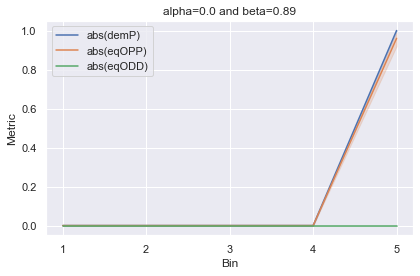

In [641]:
data_disc, demP, eqOPP, eqODD, demmeans, eqOPPmeans, eqODDmeans = plotModelSingle(model_pred=data_lr_pred, y_pred=y_pred, prot_att=ds, priv=priv, positive_class=positive_class, bins=5, alpha=a_op, beta=b_op, sample_size=0.2, num_rep=100)


In [426]:
bin_size = int(1500/10)
bins = 0
pd.pivot_table(data_disc.sort_values(by='risk').iloc[bin_size*bins:bin_size*(1+bins),:],values='prob', index=['sensitive_att'], columns=['label', 'pred'], aggfunc='count')

label           0       1    
pred            0   1   0   1
sensitive_att                
0               6   6   2   3
1              29  31  43  30

In [ ]:
bin_data = data_disc.sort_values(by='risk').iloc[bin_size*bins:bin_size*(1+bins),:]
bin_data.loc[bin_data['sensitive_att']==0,:]['pred'].sum()

2

# RF

In [488]:
parameters = {'RF__class_weight': ['balanced'],'RF__n_estimators':[10, 50, 100], 'RF__criterion': ['gini', 'entropy'], 'RF__max_depth': [None, 5, 10, 15]}
rf = RandomForestClassifier(random_state=0)

print('Starting RF training')
fit = op.get_grid(X, y_train, parameters, rf, 'RF')
        
print()
print("End for "+ds)

Starting RF training

End for unaware


In [489]:
#Run this code for storing grid results
with open('../../grid/synthetic/fairness/rf_models'+case+'.pickle', 'wb') as f:
    pickle.dump(fit, f)

In [642]:
#Run this code for storing grid results
with open('../../grid/synthetic/fairness/rf_models'+case+'.pickle', 'rb') as f:
    fit = pickle.load(f)

In [643]:
RF_best = fit.best_estimator_['RF']
y_pred = RF_best.predict(ds_test)
y_prob = RF_best.predict_proba(ds_test)

data_rf_pred = pd.DataFrame({'pred': y_pred, 'prob':y_prob[:,1]})

f1_score: 0.9926950233841609
demP: 0.8157894736842105
eqOPP: 0.6875
eqODD: nan


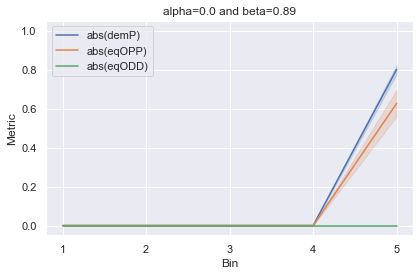

In [644]:
data_disc, demP, eqOPP, eqODD, demmeans, eqOPPmeans, eqODDmeans = plotModelSingle(model_pred=data_rf_pred, y_pred=y_pred, prot_att=ds, priv=priv, positive_class=positive_class, bins=5, alpha=a_op, beta=b_op, sample_size=0.2, num_rep=100)



# KNN

In [493]:
parameters = {'KNN__weights': ['uniform', 'distance'],'KNN__n_neighbors': [5, 10, 15, 20, 25, 30]}
knn = KNeighborsClassifier()

print('Starting KNN training')
fit = op.get_grid(X, y_train, parameters, knn, 'KNN')
        
print()
print("End for "+ds)

Starting KNN training

End for unaware


In [494]:
#Run this code for storing grid results
with open('../../grid/synthetic/fairness/knn_models'+case+'.pickle', 'wb') as f:
    pickle.dump(fit, f)

In [495]:
#Run this code for storing grid results
with open('../../grid/synthetic/fairness/knn_models'+case+'.pickle', 'rb') as f:
    fit = pickle.load(f)

In [496]:
KNN_best = fit.best_estimator_['KNN']
y_pred = KNN_best.predict(ds_test)
y_prob = KNN_best.predict_proba(ds_test)

data_knn_pred = pd.DataFrame({'pred': y_pred, 'prob':y_prob[:,1]})

f1_score: 0.9941022778115582
demP: 0.8552631578947368
eqOPP: 0.6875
eqODD: nan


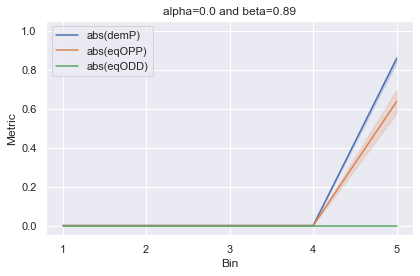

In [497]:
data_disc, demP, eqOPP, eqODD, demmeans, eqOPPmeans, eqODDmeans = plotModelSingle(model_pred=data_knn_pred, y_pred=y_pred, prot_att=ds, priv=priv, positive_class=positive_class, bins=5, alpha=a_op, beta=b_op, sample_size=0.2, num_rep=100)


# SVM

In [498]:
parameters = {'SVM__probability':[True],'SVM__kernel':['rbf'], 'SVM__C': [0.01, 0.01, 1], 'SVM__class_weight': ['balanced']}
svm = SVC(random_state=0)

print('Starting SVM training')
fit = op.get_grid(X, y_train, parameters, svm, 'SVM')
        
print()
print("End for "+ds)

Starting SVM training

End for unaware


In [499]:
#Run this code for storing grid results
with open('../../grid/synthetic/fairness/svm_models'+case+'.pickle', 'wb') as f:
    pickle.dump(fit, f)

In [500]:
#Run this code for storing grid results
with open('../../grid/synthetic/fairness/svm_models'+case+'.pickle', 'rb') as f:
    fit = pickle.load(f)

In [501]:
SVM_best = fit.best_estimator_['SVM']
y_pred = SVM_best.predict(ds_test)
y_prob = SVM_best.predict_proba(ds_test)

data_svm_pred = pd.DataFrame({'pred': y_pred, 'prob':y_prob[:,1]})

f1_score: 0.990379453887852
demP: 1.0
eqOPP: 1.0
eqODD: nan


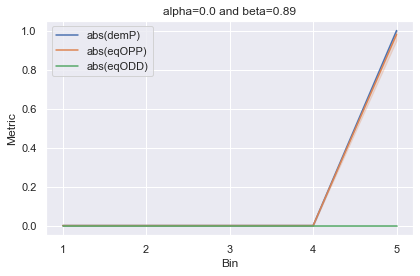

In [502]:
data_disc, demP, eqOPP, eqODD, demmeans, eqOPPmeans, eqODDmeans = plotModelSingle(model_pred=data_svm_pred, y_pred=y_pred, prot_att=ds, priv=priv, positive_class=positive_class, bins=5, alpha=a_op, beta=b_op, sample_size=0.2, num_rep=100)


In [421]:
bin_size = int(1500/4)
bins = 0
pd.pivot_table(data_disc.sort_values(by='risk').iloc[bin_size*bins:bin_size*(1+bins),:],values='prob', index=['sensitive_att'], columns=['label', 'pred'], aggfunc='count')

label           0        1     
pred            0    1   0    1
sensitive_att                  
0              11   29   7   17
1              34  104  58  115